In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime
plt.style.use('dark_background')
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')


from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neural_network import MLPClassifier
from sklearn.linear_model import LinearRegression
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import numpy as np

In [2]:
test_data=pd.read_csv("exp2_19drivers_1car_1route (1).csv")

In [3]:
test_data.columns

Index(['TIME', 'LATITUDE', 'LONGITUDE', 'ALTITUDE', 'VEHICLE_ID',
       'BAROMETRIC_PRESSURE', 'ENGINE_COOLANT_TEMP', 'FUEL_LEVEL',
       'ENGINE_LOAD', 'AMBIENT_AIR_TEMP', 'ENGINE_RPM',
       'INTAKE_MANIFOLD_PRESSURE', 'MAF', 'Term Fuel Trim Bank 1',
       'FUEL_ECONOMY', 'Long Term Fuel Trim Bank 2', 'FUEL_TYPE',
       'AIR_INTAKE_TEMP', 'FUEL_PRESSURE', 'SPEED',
       'Short Term Fuel Trim Bank 2', 'Short Term Fuel Trim Bank 1',
       'ENGINE_RUNTIME', 'THROTTLE_POS', 'DTC_NUMBER', 'TROUBLE_CODES',
       'TIMING_ADVANCE', 'EQUIV_RATIO'],
      dtype='object')

In [4]:
test_data.shape

(8261, 28)

In [5]:
# test_data=test_data.drop(['LATITUDE', 'LONGITUDE', 'ALTITUDE'],axis=1)

In [6]:
test_data.columns

Index(['TIME', 'LATITUDE', 'LONGITUDE', 'ALTITUDE', 'VEHICLE_ID',
       'BAROMETRIC_PRESSURE', 'ENGINE_COOLANT_TEMP', 'FUEL_LEVEL',
       'ENGINE_LOAD', 'AMBIENT_AIR_TEMP', 'ENGINE_RPM',
       'INTAKE_MANIFOLD_PRESSURE', 'MAF', 'Term Fuel Trim Bank 1',
       'FUEL_ECONOMY', 'Long Term Fuel Trim Bank 2', 'FUEL_TYPE',
       'AIR_INTAKE_TEMP', 'FUEL_PRESSURE', 'SPEED',
       'Short Term Fuel Trim Bank 2', 'Short Term Fuel Trim Bank 1',
       'ENGINE_RUNTIME', 'THROTTLE_POS', 'DTC_NUMBER', 'TROUBLE_CODES',
       'TIMING_ADVANCE', 'EQUIV_RATIO'],
      dtype='object')

In [7]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8261 entries, 0 to 8260
Data columns (total 28 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   TIME                         8261 non-null   object 
 1   LATITUDE                     8261 non-null   object 
 2   LONGITUDE                    8261 non-null   object 
 3   ALTITUDE                     8261 non-null   float64
 4   VEHICLE_ID                   8261 non-null   object 
 5   BAROMETRIC_PRESSURE          8158 non-null   object 
 6   ENGINE_COOLANT_TEMP          8245 non-null   object 
 7   FUEL_LEVEL                   8221 non-null   object 
 8   ENGINE_LOAD                  8219 non-null   object 
 9   AMBIENT_AIR_TEMP             8247 non-null   object 
 10  ENGINE_RPM                   8227 non-null   object 
 11  INTAKE_MANIFOLD_PRESSURE     8251 non-null   object 
 12  MAF                          8236 non-null   object 
 13  Term Fuel Trim Ban

In [8]:
test_data.isna().sum()

TIME                              0
LATITUDE                          0
LONGITUDE                         0
ALTITUDE                          0
VEHICLE_ID                        0
BAROMETRIC_PRESSURE             103
ENGINE_COOLANT_TEMP              16
FUEL_LEVEL                       40
ENGINE_LOAD                      42
AMBIENT_AIR_TEMP                 14
ENGINE_RPM                       34
INTAKE_MANIFOLD_PRESSURE         10
MAF                              25
Term Fuel Trim Bank 1          8261
FUEL_ECONOMY                   8261
Long Term Fuel Trim Bank 2     8261
FUEL_TYPE                      8261
AIR_INTAKE_TEMP                 112
FUEL_PRESSURE                  8261
SPEED                           216
Short Term Fuel Trim Bank 2    8261
Short Term Fuel Trim Bank 1      45
ENGINE_RUNTIME                   34
THROTTLE_POS                     34
DTC_NUMBER                       45
TROUBLE_CODES                  8261
TIMING_ADVANCE                   38
EQUIV_RATIO                 

In [9]:
def Investage_unique(data):
    for col in data.columns:
        df=pd.DataFrame(data[col])
        print(df.value_counts())
        print('************************************************')
Investage_unique(test_data)

TIME       
1,51354E+12    1143
1,51336E+12     987
1,5133E+12      923
1,51326E+12     912
1,51334E+12     625
1,51337E+12     625
1,51328E+12     537
1,51329E+12     493
1,51317E+12     492
1,51355E+12     443
1,51335E+12     401
1,51312E+12     391
1,51321E+12     155
1,51318E+12     134
Name: count, dtype: int64
************************************************
LATITUDE    
0.0             859
-587.220.062     22
-585.332.131     21
-585.238.849     21
-588.025.575     20
               ... 
-584.649.181      1
-584.648.959      1
-584.648.787      1
-584.646.956      1
-585.512.931      1
Name: count, Length: 6236, dtype: int64
************************************************
LONGITUDE     
0.0               859
-35.180.363        22
-3.520.272.563     21
-3.520.271.271     21
-3.517.892.687     20
                 ... 
-3.518.551.447      1
-3.518.550.292      1
-3.518.548.892      1
-3.518.545.508      1
-3.519.573.792      1
Name: count, Length: 6225, dtype: int64
**************

In [10]:
Percentage_columns=['FUEL_LEVEL','EQUIV_RATIO','ENGINE_LOAD','Short Term Fuel Trim Bank 1','THROTTLE_POS','TIMING_ADVANCE']
def handle_percentage_columns(df_cleaned1):
    global Percentage_columns
    df_cleaned=df_cleaned1.copy()
    for col in Percentage_columns:

        df_cleaned[col] = df_cleaned[col].str.replace('%', '', regex=False)  # Remove '%'
        df_cleaned[col] = df_cleaned[col].str.replace(',', '.', regex=False)  # Replace ',' with '.'
        df_cleaned[col] = pd.to_numeric(df_cleaned[col], errors='coerce')
        print(df_cleaned[col].head(1))
    return df_cleaned
df_cleaned_formatted=handle_percentage_columns(test_data)

0    74.5
Name: FUEL_LEVEL, dtype: float64
0    1.0
Name: EQUIV_RATIO, dtype: float64
0    79.2
Name: ENGINE_LOAD, dtype: float64
0   -1.6
Name: Short Term Fuel Trim Bank 1, dtype: float64
0    34.9
Name: THROTTLE_POS, dtype: float64
0    66.7
Name: TIMING_ADVANCE, dtype: float64


In [11]:
df_cleaned_formatted.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8261 entries, 0 to 8260
Data columns (total 28 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   TIME                         8261 non-null   object 
 1   LATITUDE                     8261 non-null   object 
 2   LONGITUDE                    8261 non-null   object 
 3   ALTITUDE                     8261 non-null   float64
 4   VEHICLE_ID                   8261 non-null   object 
 5   BAROMETRIC_PRESSURE          8158 non-null   object 
 6   ENGINE_COOLANT_TEMP          8245 non-null   object 
 7   FUEL_LEVEL                   8215 non-null   float64
 8   ENGINE_LOAD                  8219 non-null   float64
 9   AMBIENT_AIR_TEMP             8247 non-null   object 
 10  ENGINE_RPM                   8227 non-null   object 
 11  INTAKE_MANIFOLD_PRESSURE     8251 non-null   object 
 12  MAF                          8236 non-null   object 
 13  Term Fuel Trim Ban

In [12]:
df_cleaned_formatted["ENGINE_RUNTIME"].head()

0    00:03:02
1    00:03:08
2    00:03:12
3    00:03:16
4    00:03:20
Name: ENGINE_RUNTIME, dtype: object

In [13]:
def extract_time_components(time_str):
    if isinstance(time_str, str):
        try:
            t = datetime.strptime(time_str, "%H:%M:%S")
            return pd.Series([t.hour, t.minute, t.second], index=['ER_Hours', 'ER_Minutes', 'ER_Seconds'])
        except ValueError:

            return pd.Series([None, None, None], index=['ER_Hours', 'ER_Minutes', 'ER_Seconds'])
    else:

        return pd.Series([None, None, None], index=['ER_Hours', 'ER_Minutes', 'ER_Seconds'])

time_components = df_cleaned_formatted['ENGINE_RUNTIME'].apply(extract_time_components)
df_cleaned_formatted = df_cleaned_formatted.drop(columns=['ENGINE_RUNTIME'])

df_cleaned_formatted = df_cleaned_formatted.join(time_components)

In [14]:

df_cleaned_formatted['Total_Engine_Seconds'] = (
    (df_cleaned_formatted['ER_Hours'] * 3600) +
    (df_cleaned_formatted['ER_Minutes'] * 60) +
    df_cleaned_formatted['ER_Seconds']
)
df_cleaned_formatted = df_cleaned_formatted.drop(columns=['ER_Hours', 'ER_Minutes', 'ER_Seconds'])

In [15]:
df_cleaned_formatted.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8261 entries, 0 to 8260
Data columns (total 28 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   TIME                         8261 non-null   object 
 1   LATITUDE                     8261 non-null   object 
 2   LONGITUDE                    8261 non-null   object 
 3   ALTITUDE                     8261 non-null   float64
 4   VEHICLE_ID                   8261 non-null   object 
 5   BAROMETRIC_PRESSURE          8158 non-null   object 
 6   ENGINE_COOLANT_TEMP          8245 non-null   object 
 7   FUEL_LEVEL                   8215 non-null   float64
 8   ENGINE_LOAD                  8219 non-null   float64
 9   AMBIENT_AIR_TEMP             8247 non-null   object 
 10  ENGINE_RPM                   8227 non-null   object 
 11  INTAKE_MANIFOLD_PRESSURE     8251 non-null   object 
 12  MAF                          8236 non-null   object 
 13  Term Fuel Trim Ban

In [16]:
def print_rows_with_trouble_codes(df):
    filtered_df = df[df['TROUBLE_CODES'].notnull()]
    if 'DTC_NUMBER' in filtered_df.columns:
        print(filtered_df['DTC_NUMBER'])
        print(len(filtered_df['DTC_NUMBER']))
    else:
        print("Column 'DTC_NUMBER' does not exist in the DataFrame.")



print_rows_with_trouble_codes(df_cleaned_formatted)

Series([], Name: DTC_NUMBER, dtype: object)
0


In [17]:
df_cleaned_formatted["TROUBLE_CODES"].head()

0   NaN
1   NaN
2   NaN
3   NaN
4   NaN
Name: TROUBLE_CODES, dtype: float64

In [18]:
df_cleaned_formatted["DTC_NUMBER"].head()

0    MIL is OFF0 codes
1    MIL is OFF0 codes
2    MIL is OFF0 codes
3    MIL is OFF0 codes
4    MIL is OFF0 codes
Name: DTC_NUMBER, dtype: object

In [19]:
def drop_rows_with_nan_dtc_and_non_null_trouble_codes(df):
    mask = df['DTC_NUMBER'].isna() & df['TROUBLE_CODES'].notna() # 6 rows
    cleaned_df = df[~mask]
    return cleaned_df
temp_data = drop_rows_with_nan_dtc_and_non_null_trouble_codes(df_cleaned_formatted)

In [20]:
def impute_dtc_and_trouble_codes(df):
    def impute_row(row):
        dtc = row['DTC_NUMBER']
        trouble_code = row['TROUBLE_CODES']
        if pd.isna(dtc):
            return pd.Series([0, 0], index=['DTC_NUMBER', 'TROUBLE_CODES'])
        if 'OFF' in str(dtc):
            number = extract_number(dtc)
            if number > 0:
                return pd.Series([1, 1], index=['DTC_NUMBER', 'TROUBLE_CODES'])

        if 'ON' in str(dtc):
            number = extract_number(dtc)
            if number > 0 :
               return pd.Series([1, 1], index=['DTC_NUMBER', 'TROUBLE_CODES'])


        return pd.Series([0, 0], index=['DTC_NUMBER', 'TROUBLE_CODES'])

    def extract_number(dtc):

        import re
        match = re.search(r'(\d+)', str(dtc))
        if match:
            return int(match.group(0))
        return 0


    df[['DTC_NUMBER', 'TROUBLE_CODES']] = df.apply(impute_row, axis=1)

    return df

df_imputed = impute_dtc_and_trouble_codes(df_cleaned_formatted)

In [21]:
df_imputed["TROUBLE_CODES"].head()

0    0
1    0
2    0
3    0
4    0
Name: TROUBLE_CODES, dtype: int64

In [22]:
df_imputed["DTC_NUMBER"].head()

0    0
1    0
2    0
3    0
4    0
Name: DTC_NUMBER, dtype: int64

In [23]:
df_imputed.columns

Index(['TIME', 'LATITUDE', 'LONGITUDE', 'ALTITUDE', 'VEHICLE_ID',
       'BAROMETRIC_PRESSURE', 'ENGINE_COOLANT_TEMP', 'FUEL_LEVEL',
       'ENGINE_LOAD', 'AMBIENT_AIR_TEMP', 'ENGINE_RPM',
       'INTAKE_MANIFOLD_PRESSURE', 'MAF', 'Term Fuel Trim Bank 1',
       'FUEL_ECONOMY', 'Long Term Fuel Trim Bank 2', 'FUEL_TYPE',
       'AIR_INTAKE_TEMP', 'FUEL_PRESSURE', 'SPEED',
       'Short Term Fuel Trim Bank 2', 'Short Term Fuel Trim Bank 1',
       'THROTTLE_POS', 'DTC_NUMBER', 'TROUBLE_CODES', 'TIMING_ADVANCE',
       'EQUIV_RATIO', 'Total_Engine_Seconds'],
      dtype='object')

In [24]:
incorrect_value = '1:6032000007E803'

# Find and remove rows with the incorrect value
df_imputed = df_imputed[~df_imputed.eq(incorrect_value).any(axis=1)]

In [25]:
incorrect_value = '1:6032000007E804'

df_imputed = df_imputed[~df_imputed.eq(incorrect_value).any(axis=1)]

In [26]:
temp_columns = ['ENGINE_COOLANT_TEMP', 'AMBIENT_AIR_TEMP', 'AIR_INTAKE_TEMP']

# Convert the columns
for col in temp_columns:
    df_imputed[col] = df_imputed[col].str.replace('C', '', regex=False).astype(float)

# Check the result
print(df_imputed[temp_columns].head())

   ENGINE_COOLANT_TEMP  AMBIENT_AIR_TEMP  AIR_INTAKE_TEMP
0                 82.0              28.0             36.0
1                 83.0              28.0             36.0
2                 83.0              28.0             36.0
3                 82.0              28.0             36.0
4                 82.0              28.0             36.0


In [27]:
df_imputed.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8251 entries, 0 to 8260
Data columns (total 28 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   TIME                         8251 non-null   object 
 1   LATITUDE                     8251 non-null   object 
 2   LONGITUDE                    8251 non-null   object 
 3   ALTITUDE                     8251 non-null   float64
 4   VEHICLE_ID                   8251 non-null   object 
 5   BAROMETRIC_PRESSURE          8148 non-null   object 
 6   ENGINE_COOLANT_TEMP          8235 non-null   float64
 7   FUEL_LEVEL                   8206 non-null   float64
 8   ENGINE_LOAD                  8209 non-null   float64
 9   AMBIENT_AIR_TEMP             8237 non-null   float64
 10  ENGINE_RPM                   8217 non-null   object 
 11  INTAKE_MANIFOLD_PRESSURE     8241 non-null   object 
 12  MAF                          8226 non-null   object 
 13  Term Fuel Trim Bank 1  

In [28]:
df_imputed['BAROMETRIC_PRESSURE'] = df_imputed['BAROMETRIC_PRESSURE'].str.replace('kPa', '').astype(float)
df_imputed['ENGINE_RPM'] =df_imputed['ENGINE_RPM'].str.replace('RPM', '').astype(float)
df_imputed['INTAKE_MANIFOLD_PRESSURE'] =df_imputed['INTAKE_MANIFOLD_PRESSURE'].str.replace('kPa', '').astype(float)
df_imputed['SPEED'] =df_imputed['SPEED'].str.replace('km/h', '').astype(float)
df_imputed['MAF'] = df_imputed['MAF'].str.replace('g/s', '').str.replace(',', '.').astype(float)

In [29]:
df_imputed.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8251 entries, 0 to 8260
Data columns (total 28 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   TIME                         8251 non-null   object 
 1   LATITUDE                     8251 non-null   object 
 2   LONGITUDE                    8251 non-null   object 
 3   ALTITUDE                     8251 non-null   float64
 4   VEHICLE_ID                   8251 non-null   object 
 5   BAROMETRIC_PRESSURE          8148 non-null   float64
 6   ENGINE_COOLANT_TEMP          8235 non-null   float64
 7   FUEL_LEVEL                   8206 non-null   float64
 8   ENGINE_LOAD                  8209 non-null   float64
 9   AMBIENT_AIR_TEMP             8237 non-null   float64
 10  ENGINE_RPM                   8217 non-null   float64
 11  INTAKE_MANIFOLD_PRESSURE     8241 non-null   float64
 12  MAF                          8226 non-null   float64
 13  Term Fuel Trim Bank 1  

In [30]:
df_imputed['VEHICLE_ID'] =df_imputed['VEHICLE_ID'].str.replace('s', '').astype(float)

In [31]:
df_imputed['VEHICLE_ID']=df_imputed["VEHICLE_ID"].astype(int)

In [32]:
df_imputed['VEHICLE_ID'].head()

0    11
1    11
2    11
3    11
4    11
Name: VEHICLE_ID, dtype: int32

In [33]:
df_imputed['TIME'] = df_imputed['TIME'].str.replace(',', '').astype(float).astype(int)

# Convert the TIMESTAMP to a datetime format
df_imputed['TIME'] = pd.to_datetime(df_imputed['TIME'], unit='ms')

In [34]:
df_imputed['TIME'].head()

0   1969-12-07 03:28:36.352
1   1969-12-07 03:28:36.352
2   1969-12-07 03:28:36.352
3   1969-12-07 03:28:36.352
4   1969-12-07 03:28:36.352
Name: TIME, dtype: datetime64[ns]

In [35]:
df_imputed['MIN'] = df_imputed['TIME'].dt.minute
df_imputed['TIME'] = df_imputed['TIME'].dt.strftime('%S.%f')

In [36]:
df_imputed["TIME"]=df_imputed["TIME"].astype('float64')

In [37]:
df_imputed["TIME"].unique

<bound method Series.unique of 0       36.352
1       36.352
2       36.352
3       36.352
4       36.352
         ...  
8256    36.352
8257    36.352
8258    36.352
8259    36.352
8260    36.352
Name: TIME, Length: 8251, dtype: float64>

In [38]:
def latlon_to_cartesian(lat, lon):
    lat_rad = np.radians(lat)
    lon_rad = np.radians(lon)
    x = np.cos(lat_rad) * np.cos(lon_rad)
    y = np.cos(lat_rad) * np.sin(lon_rad)
    z = np.sin(lat_rad)
    return x, y, z

def dms_to_decimal(dms_str):
    parts = [float(part) for part in dms_str.split('.') if part]
    degrees = parts[0] if parts else 0
    minutes = parts[1] / 60 if len(parts) > 1 else 0
    seconds = parts[2] / 3600 if len(parts) > 2 else 0
    return degrees + minutes + seconds

def convert_to_cartesian(row):
    lat_decimal = dms_to_decimal(row['LATITUDE'])
    lon_decimal = dms_to_decimal(row['LONGITUDE'])
    x, y, z = latlon_to_cartesian(lat_decimal, lon_decimal)
    return pd.Series([x, y, z], index=['x', 'y', 'z'])

df_imputed[['x', 'y', 'z']] = df_imputed.apply(convert_to_cartesian, axis=1)

In [39]:
df_imputed = df_imputed.drop(['LATITUDE', 'LONGITUDE'], axis=1)
df_imputed.head()

TIME  ALTITUDE  VEHICLE_ID  BAROMETRIC_PRESSURE  ENGINE_COOLANT_TEMP  \
0  36.352      46.0          11                100.0                 82.0   
1  36.352      52.0          11                100.0                 83.0   
2  36.352      49.0          11                100.0                 83.0   
3  36.352      45.0          11                100.0                 82.0   
4  36.352      44.0          11                100.0                 82.0   

   FUEL_LEVEL  ENGINE_LOAD  AMBIENT_AIR_TEMP  ENGINE_RPM  \
0        74.5         79.2              28.0      2124.0   
1        74.1         78.4              28.0      2617.0   
2        73.7         42.0              28.0      3005.0   
3        73.7         37.3              28.0      3156.0   
4        73.3         76.1              28.0      1798.0   

   INTAKE_MANIFOLD_PRESSURE  ...  THROTTLE_POS  DTC_NUMBER  TROUBLE_CODES  \
0                      61.0  ...          34.9           0              0   
1                      44.0  ...          36.1           0              0   
2                      35.0  ...          32.2           0              0   
3                      63.0  ...          32.5           0              0   
4                      47.0  ...          33.3           0              0   

   TIMING_ADVANCE  EQUIV_RATIO  Total_Engine_Seconds  MIN         x         y  \
0            66.7          1.0                 182.0   28  0.604768  0.061279   
1            68.2          1.0                 188.0   28  0.604461  0.061103   
2            75.7          1.0                 192.0   28 -0.776564 -0.078283   
3            75.3          1.0                 196.0   28  0.607016  0.061031   
4            66.3          1.0                 200.0   28 -0.789827 -0.079218   

          z  
0 -0.794041  
1 -0.794288  
2  0.625156  
3 -0.792343  
4  0.608192  

[5 rows x 30 columns]

In [40]:
df_imputed.isna().sum()

TIME                              0
ALTITUDE                          0
VEHICLE_ID                        0
BAROMETRIC_PRESSURE             103
ENGINE_COOLANT_TEMP              16
FUEL_LEVEL                       45
ENGINE_LOAD                      42
AMBIENT_AIR_TEMP                 14
ENGINE_RPM                       34
INTAKE_MANIFOLD_PRESSURE         10
MAF                              25
Term Fuel Trim Bank 1          8251
FUEL_ECONOMY                   8251
Long Term Fuel Trim Bank 2     8251
FUEL_TYPE                      8251
AIR_INTAKE_TEMP                 112
FUEL_PRESSURE                  8251
SPEED                           216
Short Term Fuel Trim Bank 2    8251
Short Term Fuel Trim Bank 1      46
THROTTLE_POS                     36
DTC_NUMBER                        0
TROUBLE_CODES                     0
TIMING_ADVANCE                   43
EQUIV_RATIO                      36
Total_Engine_Seconds             37
MIN                               0
x                           

In [42]:
df_imputed=df_imputed.drop(['Term Fuel Trim Bank 1','FUEL_ECONOMY','Long Term Fuel Trim Bank 2','Short Term Fuel Trim Bank 2','FUEL_PRESSURE','FUEL_TYPE'],axis=1)

In [43]:
df_imputed.isna().sum()

TIME                             0
ALTITUDE                         0
VEHICLE_ID                       0
BAROMETRIC_PRESSURE            103
ENGINE_COOLANT_TEMP             16
FUEL_LEVEL                      45
ENGINE_LOAD                     42
AMBIENT_AIR_TEMP                14
ENGINE_RPM                      34
INTAKE_MANIFOLD_PRESSURE        10
MAF                             25
AIR_INTAKE_TEMP                112
SPEED                          216
Short Term Fuel Trim Bank 1     46
THROTTLE_POS                    36
DTC_NUMBER                       0
TROUBLE_CODES                    0
TIMING_ADVANCE                  43
EQUIV_RATIO                     36
Total_Engine_Seconds            37
MIN                              0
x                                0
y                                0
z                                0
dtype: int64

In [44]:
# List of columns with null values
columns_with_nulls = df_imputed.columns[df_imputed.isnull().any()].tolist()

print(columns_with_nulls)

['BAROMETRIC_PRESSURE', 'ENGINE_COOLANT_TEMP', 'FUEL_LEVEL', 'ENGINE_LOAD', 'AMBIENT_AIR_TEMP', 'ENGINE_RPM', 'INTAKE_MANIFOLD_PRESSURE', 'MAF', 'AIR_INTAKE_TEMP', 'SPEED', 'Short Term Fuel Trim Bank 1', 'THROTTLE_POS', 'TIMING_ADVANCE', 'EQUIV_RATIO', 'Total_Engine_Seconds']


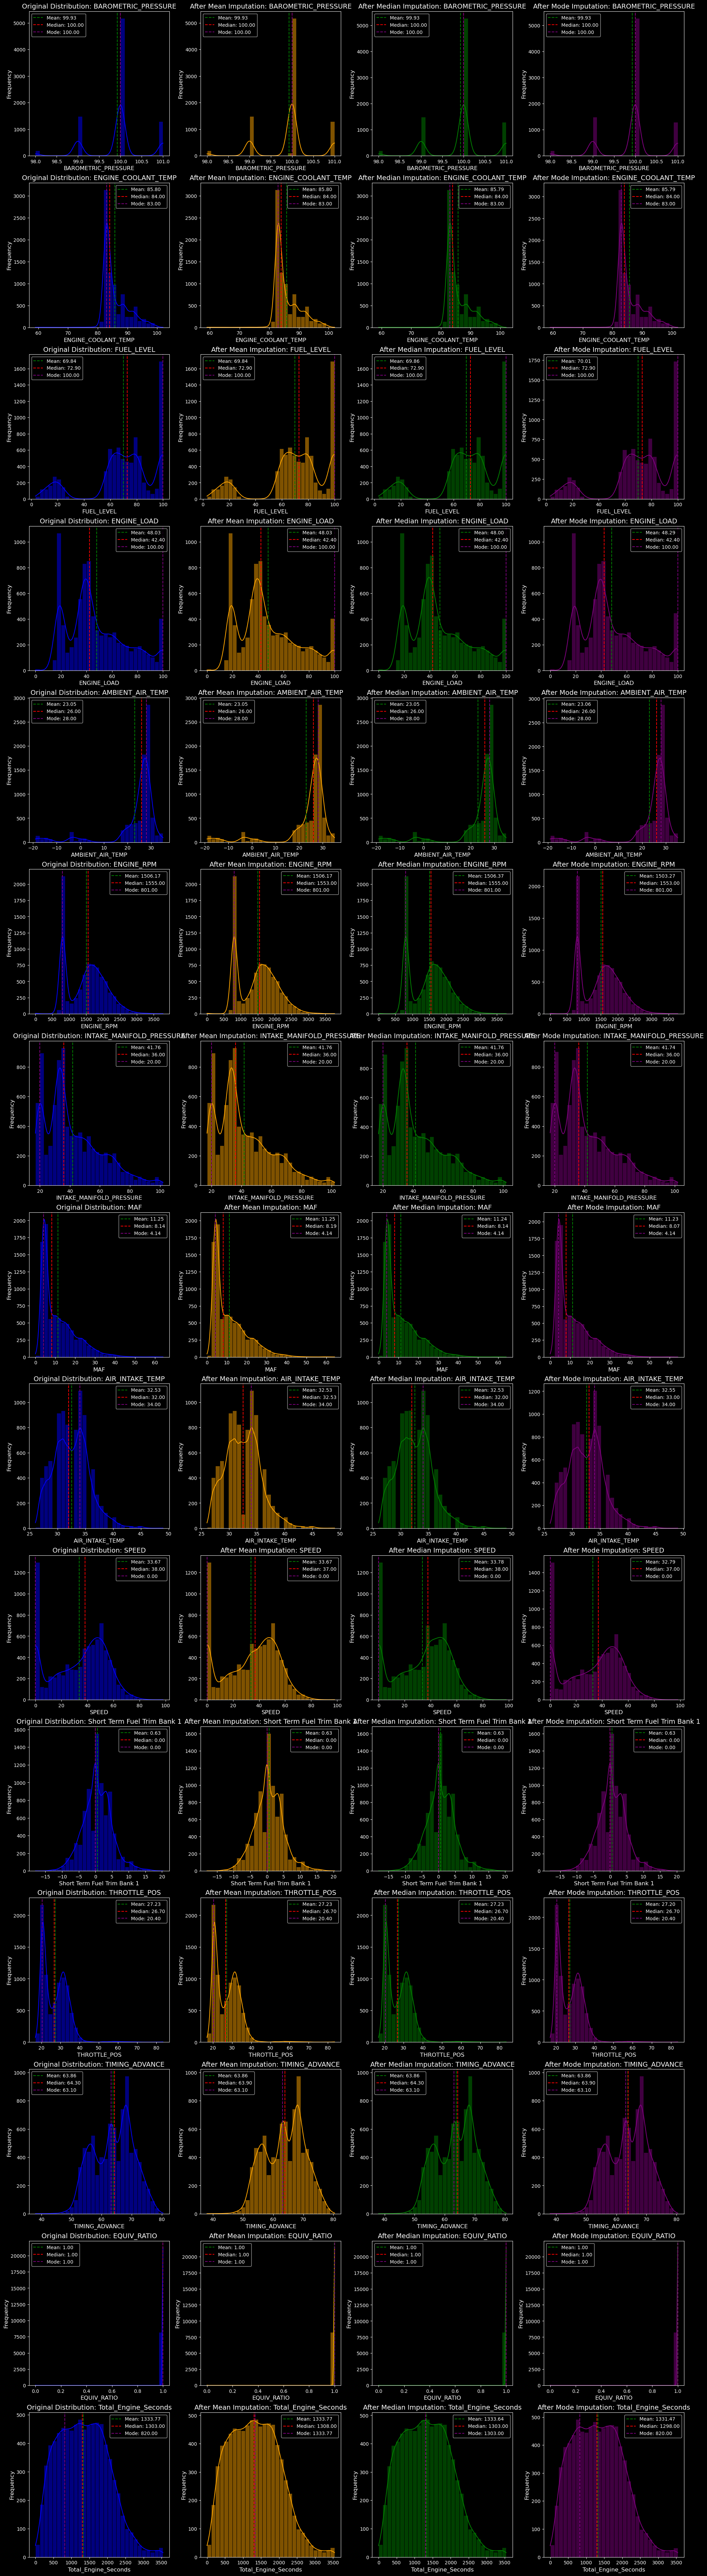

In [45]:
from sklearn.impute import SimpleImputer

def plot_imputation_comparison(df, features):
    fig, axes = plt.subplots(len(features), 4, figsize=(20, 5 * len(features)), constrained_layout=True)

    for i, feature in enumerate(features):
        ax_original, ax_mean, ax_median, ax_mode = axes[i]

        # Original Data Plot
        sns.histplot(df[feature].dropna(), bins=30, kde=True, color='blue', edgecolor='black', ax=ax_original)
        original_mean = df[feature].mean()
        original_median = df[feature].median()
        original_mode = df[feature].mode()

        ax_original.axvline(original_mean, color='green', linestyle='--', label=f'Mean: {original_mean:.2f}')
        ax_original.axvline(original_median, color='red', linestyle='--', label=f'Median: {original_median:.2f}')
        if not original_mode.empty:
            ax_original.axvline(original_mode[0], color='purple', linestyle='--', label=f'Mode: {original_mode[0]:.2f}')

        ax_original.set_title(f'Original Distribution: {feature}', fontsize=14)
        ax_original.set_xlabel(feature, fontsize=12)
        ax_original.set_ylabel('Frequency', fontsize=12)
        ax_original.legend()

        # Mean Imputation
        imputer_mean = SimpleImputer(strategy='mean')
        df_mean_imputed = df.copy()
        df_mean_imputed[feature] = imputer_mean.fit_transform(df[[feature]])

        mean_imputed_value = df_mean_imputed[feature].mean()
        median_imputed_value = df_mean_imputed[feature].median()
        mode_imputed_value = df_mean_imputed[feature].mode()

        sns.histplot(df_mean_imputed[feature], bins=30, kde=True, color='orange', edgecolor='black', ax=ax_mean)
        ax_mean.axvline(mean_imputed_value, color='green', linestyle='--', label=f'Mean: {mean_imputed_value:.2f}')
        ax_mean.axvline(median_imputed_value, color='red', linestyle='--', label=f'Median: {median_imputed_value:.2f}')
        if not mode_imputed_value.empty:
            ax_mean.axvline(mode_imputed_value[0], color='purple', linestyle='--', label=f'Mode: {mode_imputed_value[0]:.2f}')

        ax_mean.set_title(f'After Mean Imputation: {feature}', fontsize=14)
        ax_mean.set_xlabel(feature, fontsize=12)
        ax_mean.set_ylabel('Frequency', fontsize=12)
        ax_mean.legend()

        # Median Imputation
        imputer_median = SimpleImputer(strategy='median')
        df_median_imputed = df.copy()
        df_median_imputed[feature] = imputer_median.fit_transform(df[[feature]])

        mean_imputed_value = df_median_imputed[feature].mean()
        median_imputed_value = df_median_imputed[feature].median()
        mode_imputed_value = df_median_imputed[feature].mode()

        sns.histplot(df_median_imputed[feature], bins=30, kde=True, color='green', edgecolor='black', ax=ax_median)
        ax_median.axvline(mean_imputed_value, color='green', linestyle='--', label=f'Mean: {mean_imputed_value:.2f}')
        ax_median.axvline(median_imputed_value, color='red', linestyle='--', label=f'Median: {median_imputed_value:.2f}')
        if not mode_imputed_value.empty:
            ax_median.axvline(mode_imputed_value[0], color='purple', linestyle='--', label=f'Mode: {mode_imputed_value[0]:.2f}')

        ax_median.set_title(f'After Median Imputation: {feature}', fontsize=14)
        ax_median.set_xlabel(feature, fontsize=12)
        ax_median.set_ylabel('Frequency', fontsize=12)
        ax_median.legend()

        # Mode Imputation
        imputer_mode = SimpleImputer(strategy='most_frequent')
        df_mode_imputed = df.copy()
        df_mode_imputed[feature] = imputer_mode.fit_transform(df[[feature]])

        mean_imputed_value = df_mode_imputed[feature].mean()
        median_imputed_value = df_mode_imputed[feature].median()
        mode_imputed_value = df_mode_imputed[feature].mode()

        sns.histplot(df_mode_imputed[feature], bins=30, kde=True, color='purple', edgecolor='black', ax=ax_mode)
        ax_mode.axvline(mean_imputed_value, color='green', linestyle='--', label=f'Mean: {mean_imputed_value:.2f}')
        ax_mode.axvline(median_imputed_value, color='red', linestyle='--', label=f'Median: {median_imputed_value:.2f}')
        if not mode_imputed_value.empty:
            ax_mode.axvline(mode_imputed_value[0], color='purple', linestyle='--', label=f'Mode: {mode_imputed_value[0]:.2f}')

        ax_mode.set_title(f'After Mode Imputation: {feature}', fontsize=14)
        ax_mode.set_xlabel(feature, fontsize=12)
        ax_mode.set_ylabel('Frequency', fontsize=12)
        ax_mode.legend()

    plt.show()

# Example usage

plot_imputation_comparison(df_imputed, columns_with_nulls)

In [46]:
df_imputed.columns

Index(['TIME', 'ALTITUDE', 'VEHICLE_ID', 'BAROMETRIC_PRESSURE',
       'ENGINE_COOLANT_TEMP', 'FUEL_LEVEL', 'ENGINE_LOAD', 'AMBIENT_AIR_TEMP',
       'ENGINE_RPM', 'INTAKE_MANIFOLD_PRESSURE', 'MAF', 'AIR_INTAKE_TEMP',
       'SPEED', 'Short Term Fuel Trim Bank 1', 'THROTTLE_POS', 'DTC_NUMBER',
       'TROUBLE_CODES', 'TIMING_ADVANCE', 'EQUIV_RATIO',
       'Total_Engine_Seconds', 'MIN', 'x', 'y', 'z'],
      dtype='object')

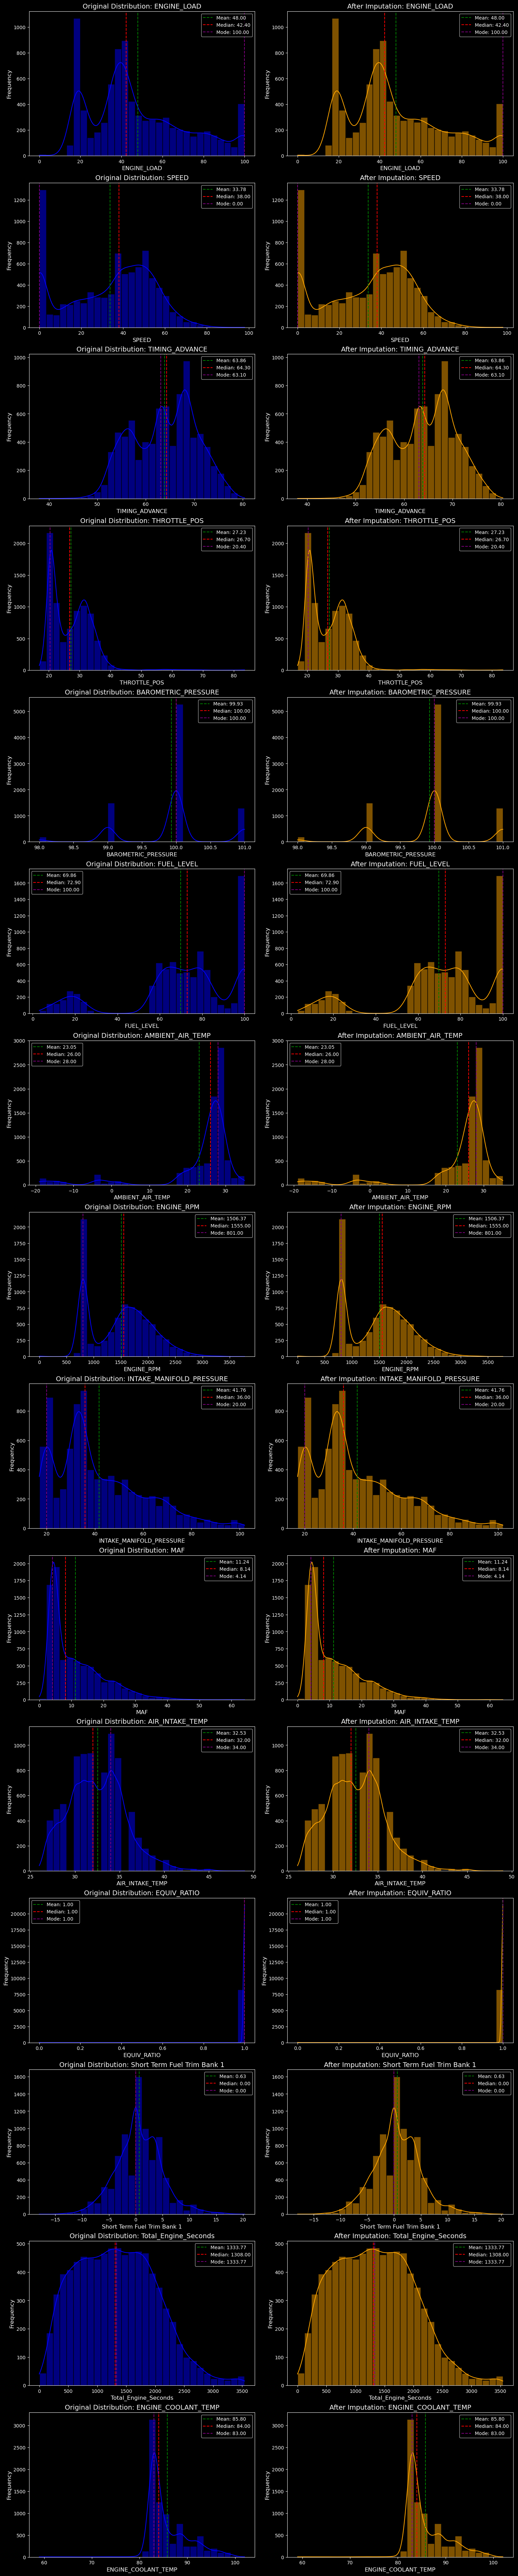

In [52]:

from sklearn.impute import SimpleImputer
def impute_and_plot_comparison(df, median_features, mode_features,mean_features):

    df_imputed2 = df.copy()

    imputer_median = SimpleImputer(strategy='median')
    df_imputed2[median_features] = imputer_median.fit_transform(df[median_features])

    imputer_mean = SimpleImputer(strategy='mean')
    df_imputed2[mean_features] = imputer_mean.fit_transform(df[mean_features])


    imputer_mode = SimpleImputer(strategy='most_frequent')
    df_imputed2[mode_features] = imputer_mode.fit_transform(df[mode_features])


    num_features = len(median_features + mode_features + mean_features)
    fig, axes = plt.subplots(num_features, 2, figsize=(15, 5 * num_features), constrained_layout=True)

    for i, feature in enumerate(median_features + mode_features + mean_features):
        ax_original, ax_imputed = axes[i]

        sns.histplot(df[feature].dropna(), bins=30, kde=True, color='blue', edgecolor='black', ax=ax_original)
        ax_original.set_title(f'Original Distribution: {feature}', fontsize=14)
        ax_original.set_xlabel(feature, fontsize=12)
        ax_original.set_ylabel('Frequency', fontsize=12)


        mean_value = df[feature].mean()
        median_value = df[feature].median()
        mode_value = df[feature].mode()

        ax_original.axvline(mean_value, color='green', linestyle='--', label=f'Mean: {mean_value:.2f}')
        ax_original.axvline(median_value, color='red', linestyle='--', label=f'Median: {median_value:.2f}')
        if not mode_value.empty:
            ax_original.axvline(mode_value[0], color='purple', linestyle='--', label=f'Mode: {mode_value[0]:.2f}')
        ax_original.legend()


        sns.histplot(df_imputed2[feature], bins=30, kde=True, color='orange', edgecolor='black', ax=ax_imputed)
        ax_imputed.set_title(f'After Imputation: {feature}', fontsize=14)
        ax_imputed.set_xlabel(feature, fontsize=12)
        ax_imputed.set_ylabel('Frequency', fontsize=12)


        mean_value_imputed = df_imputed2[feature].mean()
        median_value_imputed = df_imputed2[feature].median()
        mode_value_imputed = df_imputed2[feature].mode()

        ax_imputed.axvline(mean_value_imputed, color='green', linestyle='--', label=f'Mean: {mean_value_imputed:.2f}')
        ax_imputed.axvline(median_value_imputed, color='red', linestyle='--', label=f'Median: {median_value_imputed:.2f}')
        if not mode_value_imputed.empty:
            ax_imputed.axvline(mode_value_imputed[0], color='purple', linestyle='--', label=f'Mode: {mode_value_imputed[0]:.2f}')
        ax_imputed.legend()

    plt.show()
    return df_imputed2


mean_features= [ 'Short Term Fuel Trim Bank 1','Total_Engine_Seconds','ENGINE_COOLANT_TEMP']

median_features = [
     'ENGINE_LOAD','SPEED',
    'TIMING_ADVANCE' ,'THROTTLE_POS','BAROMETRIC_PRESSURE',"FUEL_LEVEL",'AMBIENT_AIR_TEMP','ENGINE_RPM','INTAKE_MANIFOLD_PRESSURE',"MAF", 'AIR_INTAKE_TEMP']

mode_features = [
    "EQUIV_RATIO",
]


df_imputed=impute_and_plot_comparison(df_imputed, median_features, mode_features,mean_features)

In [53]:
df_imputed.isna().sum()

TIME                           0
ALTITUDE                       0
VEHICLE_ID                     0
BAROMETRIC_PRESSURE            0
ENGINE_COOLANT_TEMP            0
FUEL_LEVEL                     0
ENGINE_LOAD                    0
AMBIENT_AIR_TEMP               0
ENGINE_RPM                     0
INTAKE_MANIFOLD_PRESSURE       0
MAF                            0
AIR_INTAKE_TEMP                0
SPEED                          0
Short Term Fuel Trim Bank 1    0
THROTTLE_POS                   0
DTC_NUMBER                     0
TROUBLE_CODES                  0
TIMING_ADVANCE                 0
EQUIV_RATIO                    0
Total_Engine_Seconds           0
MIN                            0
x                              0
y                              0
z                              0
dtype: int64

In [61]:
df_imputed.duplicated().sum()

3

In [64]:
df_imputed.to_csv("Preprocced_Test.csv")

In [119]:
df_cleaned=df_imputed.copy()

In [120]:
print(df_imputed.iloc[0])

TIME                             36.352000
ALTITUDE                         46.000000
VEHICLE_ID                       11.000000
BAROMETRIC_PRESSURE             100.000000
ENGINE_COOLANT_TEMP              82.000000
FUEL_LEVEL                       74.500000
ENGINE_LOAD                      79.200000
AMBIENT_AIR_TEMP                 28.000000
ENGINE_RPM                     2124.000000
INTAKE_MANIFOLD_PRESSURE         61.000000
MAF                              24.770000
AIR_INTAKE_TEMP                  36.000000
SPEED                            48.000000
Short Term Fuel Trim Bank 1      -1.600000
THROTTLE_POS                     34.900000
DTC_NUMBER                        0.000000
TROUBLE_CODES                     0.000000
TIMING_ADVANCE                   66.700000
EQUIV_RATIO                       1.000000
Total_Engine_Seconds            182.000000
MIN                              28.000000
x                                 0.604768
y                                 0.061279
z          

In [121]:
from sklearn.model_selection import ParameterGrid, GridSearchCV, cross_val_score
from sklearn.pipeline import Pipeline
from sklearn.feature_selection import RFE
from sklearn.preprocessing import StandardScaler,LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.pipeline import Pipeline
from sklearn.cluster import KMeans, DBSCAN, AgglomerativeClustering, MeanShift
from sklearn.metrics import silhouette_score


In [122]:
df_imputed.head()

TIME  ALTITUDE  VEHICLE_ID  BAROMETRIC_PRESSURE  ENGINE_COOLANT_TEMP  \
0  36.352      46.0          11                100.0                 82.0   
1  36.352      52.0          11                100.0                 83.0   
2  36.352      49.0          11                100.0                 83.0   
3  36.352      45.0          11                100.0                 82.0   
4  36.352      44.0          11                100.0                 82.0   

   FUEL_LEVEL  ENGINE_LOAD  AMBIENT_AIR_TEMP  ENGINE_RPM  \
0        74.5         79.2              28.0      2124.0   
1        74.1         78.4              28.0      2617.0   
2        73.7         42.0              28.0      3005.0   
3        73.7         37.3              28.0      3156.0   
4        73.3         76.1              28.0      1798.0   

   INTAKE_MANIFOLD_PRESSURE  ...  THROTTLE_POS  DTC_NUMBER  TROUBLE_CODES  \
0                      61.0  ...          34.9           0              0   
1                      44.0  ...          36.1           0              0   
2                      35.0  ...          32.2           0              0   
3                      63.0  ...          32.5           0              0   
4                      47.0  ...          33.3           0              0   

   TIMING_ADVANCE  EQUIV_RATIO  Total_Engine_Seconds  MIN         x         y  \
0            66.7          1.0                 182.0   28  0.604768  0.061279   
1            68.2          1.0                 188.0   28  0.604461  0.061103   
2            75.7          1.0                 192.0   28 -0.776564 -0.078283   
3            75.3          1.0                 196.0   28  0.607016  0.061031   
4            66.3          1.0                 200.0   28 -0.789827 -0.079218   

          z  
0 -0.794041  
1 -0.794288  
2  0.625156  
3 -0.792343  
4  0.608192  

[5 rows x 24 columns]

In [123]:
import sys
import numpy as np
from sklearn.preprocessing import StandardScaler

# Create a copy of the DataFrame


# Define the columns to exclude from scaling
# columns_to_exclude = ['VEHICLE_ID', 'TIMESTAMP', 'MARK', 'MODEL']
columns_to_exclude = ['VEHICLE_ID', 'TIME',"x","y","z"]
columns_to_scale = df_cleaned.columns.difference(columns_to_exclude)
columns_to_scale

# Scale the features
scaler = StandardScaler()
df_cleaned[columns_to_scale] = scaler.fit_transform(df_cleaned[columns_to_scale])

In [126]:
# Save the scaler to a file
dump(scaler, 'scaler_test.joblib')

['scaler_test.joblib']

In [118]:
print(columns_to_scale)

Index(['AIR_INTAKE_TEMP', 'ALTITUDE', 'AMBIENT_AIR_TEMP',
       'BAROMETRIC_PRESSURE', 'DTC_NUMBER', 'ENGINE_COOLANT_TEMP',
       'ENGINE_LOAD', 'ENGINE_RPM', 'EQUIV_RATIO', 'FUEL_LEVEL',
       'INTAKE_MANIFOLD_PRESSURE', 'MAF', 'MIN', 'SPEED',
       'Short Term Fuel Trim Bank 1', 'THROTTLE_POS', 'TIMING_ADVANCE',
       'TROUBLE_CODES', 'Total_Engine_Seconds'],
      dtype='object')


In [125]:
df_cleaned[0]

KeyError: 0

In [113]:
print(df_cleaned.iloc[0])

TIME                           36.352000
ALTITUDE                        0.699389
VEHICLE_ID                     11.000000
BAROMETRIC_PRESSURE             0.108885
ENGINE_COOLANT_TEMP            -0.874316
FUEL_LEVEL                      0.182797
ENGINE_LOAD                     1.343997
AMBIENT_AIR_TEMP                0.444046
ENGINE_RPM                      1.099913
INTAKE_MANIFOLD_PRESSURE        1.040249
MAF                             1.582628
AIR_INTAKE_TEMP                 1.089402
SPEED                           0.694227
Short Term Fuel Trim Bank 1    -0.510500
THROTTLE_POS                    1.129034
DTC_NUMBER                      0.000000
TROUBLE_CODES                   0.000000
TIMING_ADVANCE                  0.427282
EQUIV_RATIO                     0.031153
Total_Engine_Seconds           -1.675055
MIN                             0.000000
x                               0.604768
y                               0.061279
z                              -0.794041
labels          

In [112]:
df_cleaned.columns

Index(['TIME', 'ALTITUDE', 'VEHICLE_ID', 'BAROMETRIC_PRESSURE',
       'ENGINE_COOLANT_TEMP', 'FUEL_LEVEL', 'ENGINE_LOAD', 'AMBIENT_AIR_TEMP',
       'ENGINE_RPM', 'INTAKE_MANIFOLD_PRESSURE', 'MAF', 'AIR_INTAKE_TEMP',
       'SPEED', 'Short Term Fuel Trim Bank 1', 'THROTTLE_POS', 'DTC_NUMBER',
       'TROUBLE_CODES', 'TIMING_ADVANCE', 'EQUIV_RATIO',
       'Total_Engine_Seconds', 'MIN', 'x', 'y', 'z', 'labels'],
      dtype='object')

Number of Components: 1, Cumulative Explained Variance Ratio: 0.6222, Approx. AIC: 42364.2249
Number of Components: 2, Cumulative Explained Variance Ratio: 0.7141, Approx. AIC: 37783.2877
Number of Components: 3, Cumulative Explained Variance Ratio: 0.7644, Approx. AIC: 35000.9642
Number of Components: 4, Cumulative Explained Variance Ratio: 0.8067, Approx. AIC: 33074.2852
Number of Components: 5, Cumulative Explained Variance Ratio: 0.8398, Approx. AIC: 31566.6747
Number of Components: 6, Cumulative Explained Variance Ratio: 0.8660, Approx. AIC: 30317.6041
Number of Components: 7, Cumulative Explained Variance Ratio: 0.8892, Approx. AIC: 29265.9808
Number of Components: 8, Cumulative Explained Variance Ratio: 0.9122, Approx. AIC: 28377.1269
Number of Components: 9, Cumulative Explained Variance Ratio: 0.9329, Approx. AIC: 27592.3795
Number of Components: 10, Cumulative Explained Variance Ratio: 0.9469, Approx. AIC: 26847.9743
Number of Components: 11, Cumulative Explained Variance Rat

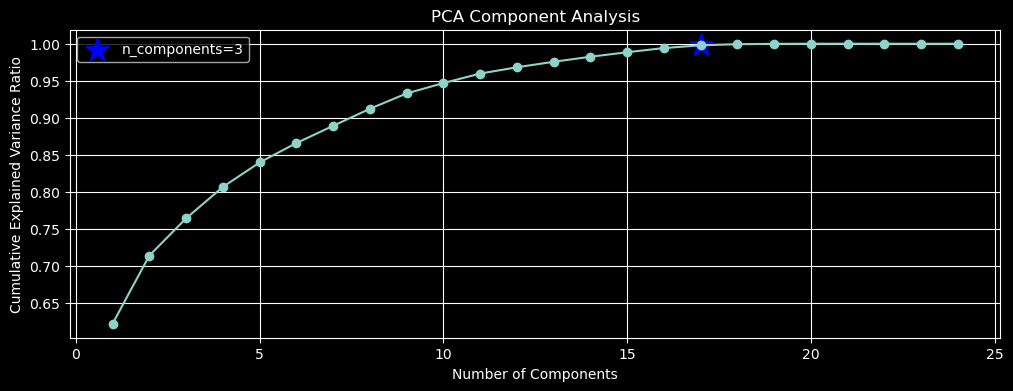

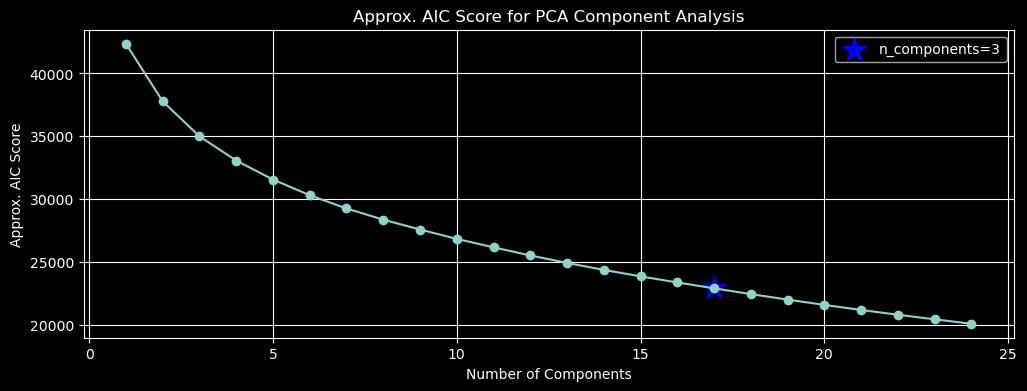

In [73]:
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score


X = df_cleaned.copy()
n_components = np.arange(1, 25)  # Considering up to 29 components
explained_variance_ratios = []
aic_scores = []

for n in n_components:
    pca = PCA(n_components=n)
    X_transformed = pca.fit_transform(X)

    # Cumulative explained variance ratio
    cum_explained_variance = np.sum(pca.explained_variance_ratio_)
    explained_variance_ratios.append(cum_explained_variance)

    # Compute AIC-like score
    k = n  # Number of components
    # PCA does not use likelihood directly; this is an approximation
    # Assuming 'variance' to approximate the log-likelihood term
    log_likelihood = -0.5 * X.shape[0] * np.log(2 * np.pi * np.mean(pca.explained_variance_))
    aic = 2 * k - 2 * log_likelihood
    aic_scores.append(aic)

    print(f"Number of Components: {n}, Cumulative Explained Variance Ratio: {cum_explained_variance:.4f}, Approx. AIC: {aic:.4f}")

# Plot the cumulative explained variance ratio
plt.figure(figsize=(12, 4))
plt.plot(n_components, explained_variance_ratios, marker='o')
plt.scatter(17, explained_variance_ratios[16], c='b', marker='*', label="n_components=3", s=300)
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance Ratio')
plt.title('PCA Component Analysis')
plt.legend()
plt.grid(True)
plt.show()

# Plot the AIC scores
plt.figure(figsize=(12, 4))
plt.plot(n_components, aic_scores, marker='o')
plt.scatter(17, aic_scores[16], c='b', marker='*', label="n_components=3", s=300)
plt.xlabel('Number of Components')
plt.ylabel('Approx. AIC Score')
plt.title('Approx. AIC Score for PCA Component Analysis')
plt.legend()
plt.grid(True)
plt.show()

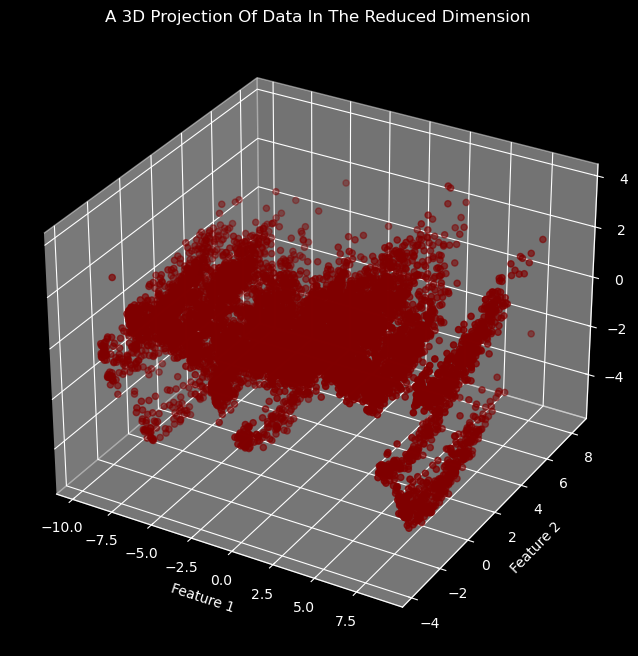

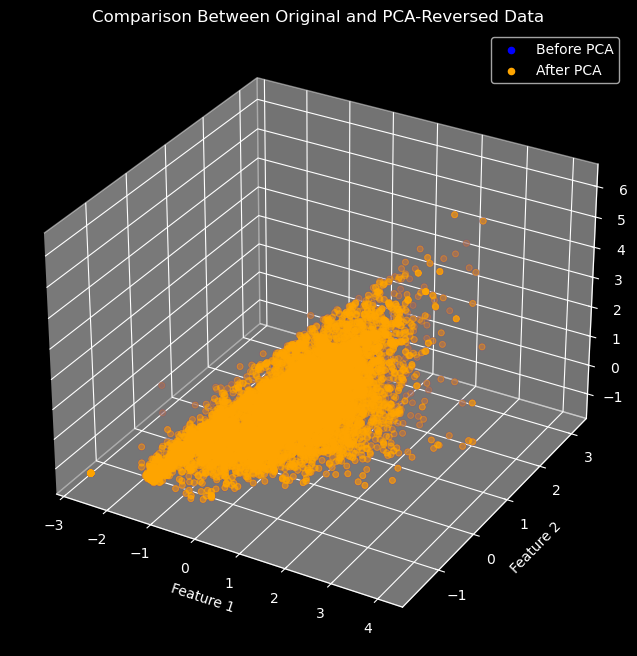

In [80]:
pca = PCA(n_components=19,copy=True)
X=df_cleaned.copy()
X_transformed = pca.fit_transform(X)
afterreverse = pca.inverse_transform(X_transformed)

# Create DataFrames for PCA components and reversed data
PCA_ds = pd.DataFrame(X_transformed, columns=[f"f{i+1}" for i in range(19)])
afterreverse_df = pd.DataFrame(afterreverse, columns=X.columns)

# Select three components for 3D visualization
# Ensure you have at least 3 components in PCA
x = PCA_ds["f1"]
y = PCA_ds["f2"]
z = PCA_ds["f3"]

# Plot 3D projection of PCA-transformed data
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection="3d")
ax.scatter(x, y, z, c="maroon", marker="o")
ax.set_title("A 3D Projection Of Data In The Reduced Dimension")
ax.set_xlabel('Feature 1')
ax.set_ylabel('Feature 2')
ax.set_zlabel('Feature 3')
plt.show()

# Select features from the original DataFrame
x1 = df_cleaned["ENGINE_RPM"]
y1 = df_cleaned["SPEED"]
z1 = df_cleaned["MAF"]

# Select the same features from the reversed data
# Ensure these columns exist in afterreverse_df
x2 = afterreverse_df["ENGINE_RPM"]
y2 = afterreverse_df["SPEED"]
z2 = afterreverse_df["MAF"]

# Plot comparison between original and PCA-reversed data
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection="3d")
ax.scatter(x1, y1, z1, c="blue", marker="o", label="Before PCA")
ax.scatter(x2, y2, z2, c="orange", marker="o", label="After PCA")
ax.set_title("Comparison Between Original and PCA-Reversed Data")
ax.set_xlabel('Feature 1')
ax.set_ylabel('Feature 2')
ax.set_zlabel('Feature 3')
plt.legend()
plt.show()


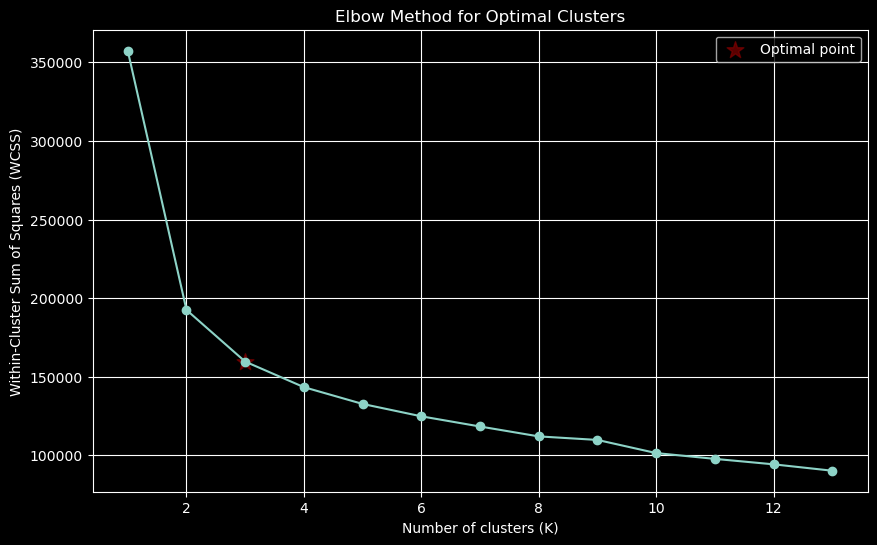

In [81]:
X_scaled = df_cleaned.copy()
pca = PCA(n_components=17)  # Adjust n_components if needed
X_transformed = pca.fit_transform(X_scaled)


wcss = []
for i in range(1, 14):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(X_transformed)
    wcss.append(kmeans.inertia_)

# Plot the Elbow Method
plt.figure(figsize=(10, 6))
plt.plot(range(1, 14), wcss, marker='o')
plt.scatter(3, wcss[2], marker='*', s=159, alpha=0.7, c='maroon', label='Optimal point')
plt.title('Elbow Method for Optimal Clusters')
plt.xlabel('Number of clusters (K)')
plt.ylabel('Within-Cluster Sum of Squares (WCSS)')
plt.legend()
plt.grid(True)
plt.show()

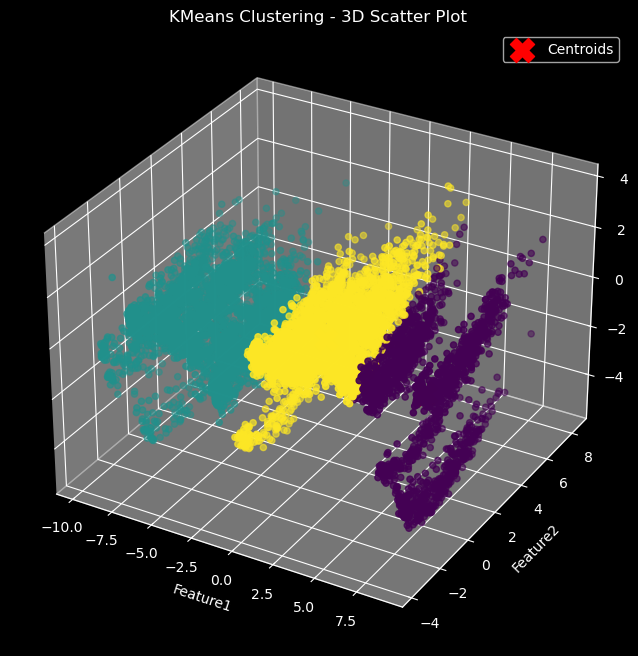

In [82]:
kmeans = KMeans(n_clusters=3, init='k-means++', max_iter=300, n_init=10, random_state=0)
labels = kmeans.fit_predict(X_transformed)
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
scatter = ax.scatter(x, y, z, c=labels, cmap='viridis')
ax.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], kmeans.cluster_centers_[:, 2],
           s=300, c='red', marker='X', label='Centroids')

ax.set_xlabel('Feature1')
ax.set_ylabel('Feature2')
ax.set_zlabel('Feature3')
ax.set_title('KMeans Clustering - 3D Scatter Plot')
ax.legend()

plt.show()

In [83]:
from sklearn.metrics import silhouette_score
silhouette_avg = silhouette_score(X_transformed, labels)
silhouette_avg

0.2742266766220427

In [84]:
df_cleaned_labeled_final=df_cleaned.copy()
df_cleaned['labels'] = labels
df_cleaned_labeled_final=df_cleaned.copy()
df_cleaned_labeled_final.head()

TIME  ALTITUDE  VEHICLE_ID  BAROMETRIC_PRESSURE  ENGINE_COOLANT_TEMP  \
0  36.352  0.699389          11             0.108885            -0.874316   
1  36.352  1.140426          11             0.108885            -0.643975   
2  36.352  0.919907          11             0.108885            -0.643975   
3  36.352  0.625883          11             0.108885            -0.874316   
4  36.352  0.552377          11             0.108885            -0.874316   

   FUEL_LEVEL  ENGINE_LOAD  AMBIENT_AIR_TEMP  ENGINE_RPM  \
0    0.182797     1.343997          0.444046    1.099913   
1    0.167034     1.309536          0.444046    1.977884   
2    0.151272    -0.258426          0.444046    2.668863   
3    0.151272    -0.460883          0.444046    2.937775   
4    0.135509     1.210462          0.444046    0.519348   

   INTAKE_MANIFOLD_PRESSURE  ...  DTC_NUMBER  TROUBLE_CODES  TIMING_ADVANCE  \
0                  1.040249  ...         0.0            0.0        0.427282   
1                  0.121323  ...         0.0            0.0        0.653083   
2                 -0.365168  ...         0.0            0.0        1.782087   
3                  1.148358  ...         0.0            0.0        1.721873   
4                  0.283486  ...         0.0            0.0        0.367068   

   EQUIV_RATIO  Total_Engine_Seconds  MIN         x         y         z  \
0     0.031153             -1.675055  0.0  0.604768  0.061279 -0.794041   
1     0.031153             -1.666329  0.0  0.604461  0.061103 -0.794288   
2     0.031153             -1.660512  0.0 -0.776564 -0.078283  0.625156   
3     0.031153             -1.654694  0.0  0.607016  0.061031 -0.792343   
4     0.031153             -1.648877  0.0 -0.789827 -0.079218  0.608192   

   labels  
0       2  
1       2  
2       2  
3       2  
4       2  

[5 rows x 25 columns]

In [117]:
df_cleaned_labeled_final.columns

Index(['TIME', 'ALTITUDE', 'VEHICLE_ID', 'BAROMETRIC_PRESSURE',
       'ENGINE_COOLANT_TEMP', 'FUEL_LEVEL', 'ENGINE_LOAD', 'AMBIENT_AIR_TEMP',
       'ENGINE_RPM', 'INTAKE_MANIFOLD_PRESSURE', 'MAF', 'AIR_INTAKE_TEMP',
       'SPEED', 'Short Term Fuel Trim Bank 1', 'THROTTLE_POS', 'DTC_NUMBER',
       'TROUBLE_CODES', 'TIMING_ADVANCE', 'EQUIV_RATIO',
       'Total_Engine_Seconds', 'MIN', 'x', 'y', 'z', 'labels'],
      dtype='object')

In [115]:
print(df_cleaned_labeled_final.iloc[0])

TIME                           36.352000
ALTITUDE                        0.699389
VEHICLE_ID                     11.000000
BAROMETRIC_PRESSURE             0.108885
ENGINE_COOLANT_TEMP            -0.874316
FUEL_LEVEL                      0.182797
ENGINE_LOAD                     1.343997
AMBIENT_AIR_TEMP                0.444046
ENGINE_RPM                      1.099913
INTAKE_MANIFOLD_PRESSURE        1.040249
MAF                             1.582628
AIR_INTAKE_TEMP                 1.089402
SPEED                           0.694227
Short Term Fuel Trim Bank 1    -0.510500
THROTTLE_POS                    1.129034
DTC_NUMBER                      0.000000
TROUBLE_CODES                   0.000000
TIMING_ADVANCE                  0.427282
EQUIV_RATIO                     0.031153
Total_Engine_Seconds           -1.675055
MIN                             0.000000
x                               0.604768
y                               0.061279
z                              -0.794041
labels          


Model: Random Forest
Confusion Matrix:
[[ 467    0    9]
 [   0  979    0]
 [   0    0 1021]]
Accuracy: 0.9964

Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.98      0.99       476
           1       1.00      1.00      1.00       979
           2       0.99      1.00      1.00      1021

    accuracy                           1.00      2476
   macro avg       1.00      0.99      1.00      2476
weighted avg       1.00      1.00      1.00      2476



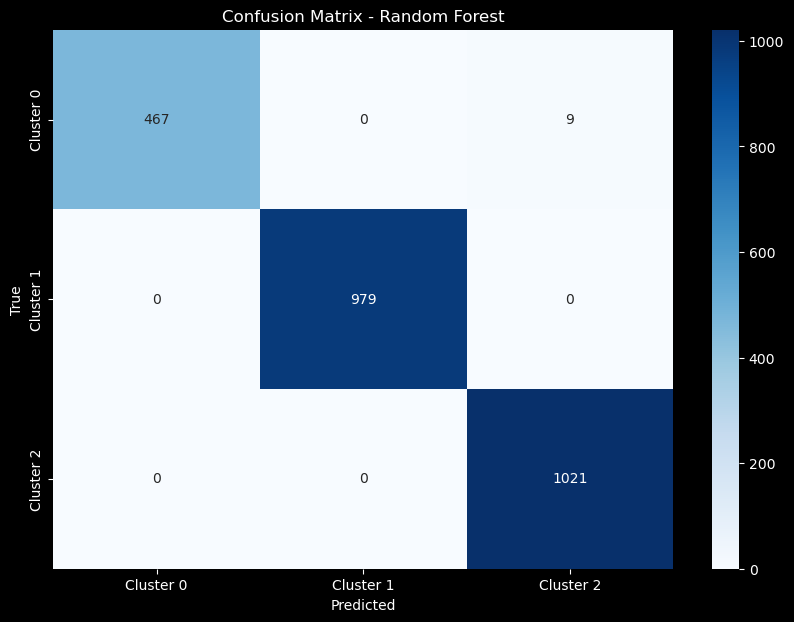


Model: XGBoost
Confusion Matrix:
[[ 471    0    5]
 [   0  979    0]
 [   6    0 1015]]
Accuracy: 0.9956

Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.99      0.99       476
           1       1.00      1.00      1.00       979
           2       1.00      0.99      0.99      1021

    accuracy                           1.00      2476
   macro avg       0.99      0.99      0.99      2476
weighted avg       1.00      1.00      1.00      2476



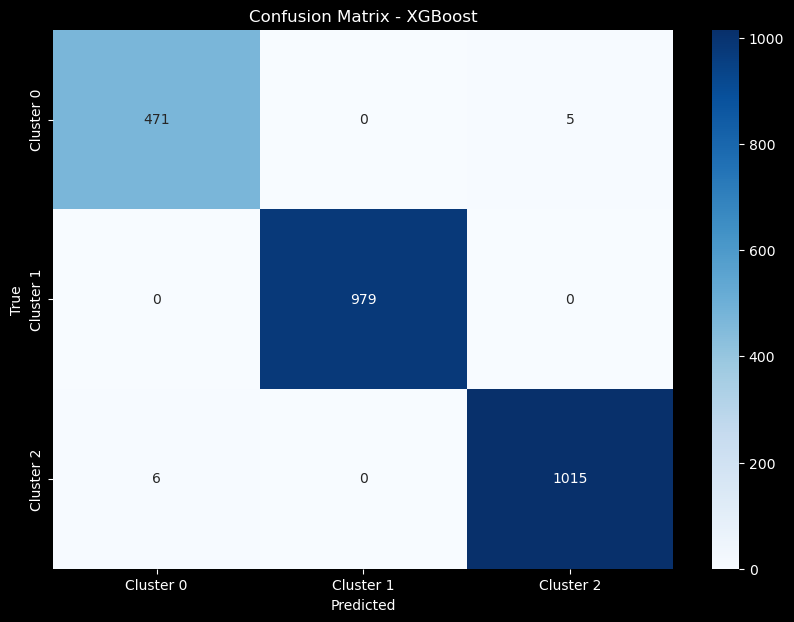

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001541 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2471
[LightGBM] [Info] Number of data points in the train set: 5775, number of used features: 19
[LightGBM] [Info] Start training from score -1.599959
[LightGBM] [Info] Start training from score -0.903387
[LightGBM] [Info] Start training from score -0.934199
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further

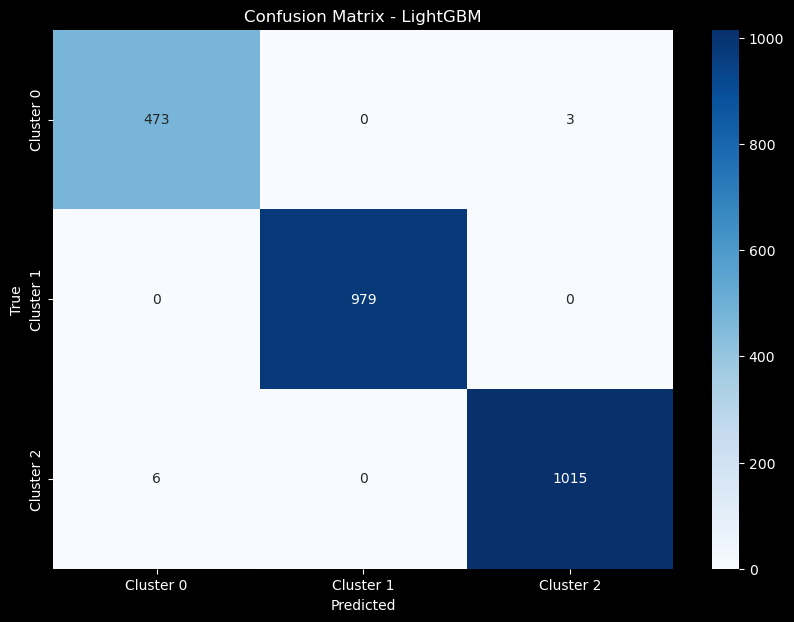


Model: Naive Bayes
Confusion Matrix:
[[433   0  43]
 [  0 942  37]
 [  2  36 983]]
Accuracy: 0.9523

Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.91      0.95       476
           1       0.96      0.96      0.96       979
           2       0.92      0.96      0.94      1021

    accuracy                           0.95      2476
   macro avg       0.96      0.94      0.95      2476
weighted avg       0.95      0.95      0.95      2476



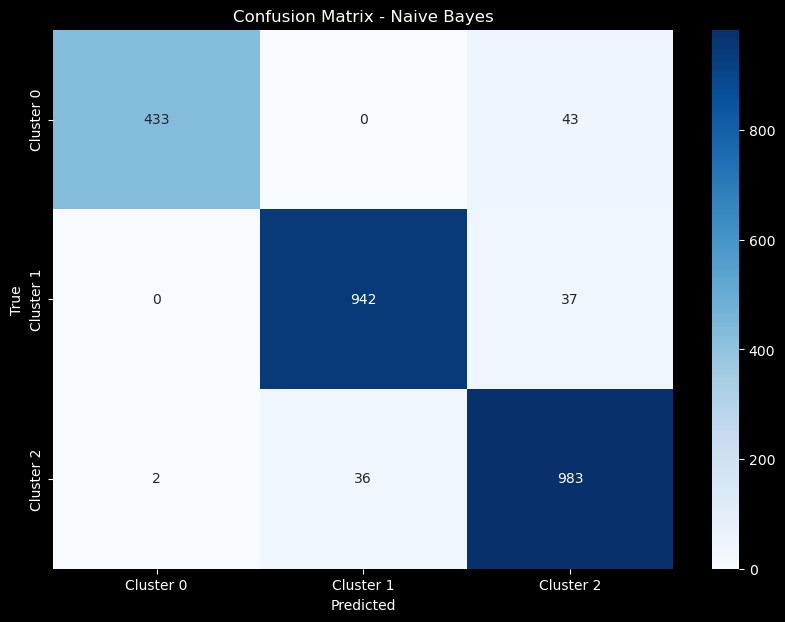


Model: Decision Tree
Confusion Matrix:
[[ 465    0   11]
 [   0  979    0]
 [   4    0 1017]]
Accuracy: 0.9939

Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.98      0.98       476
           1       1.00      1.00      1.00       979
           2       0.99      1.00      0.99      1021

    accuracy                           0.99      2476
   macro avg       0.99      0.99      0.99      2476
weighted avg       0.99      0.99      0.99      2476



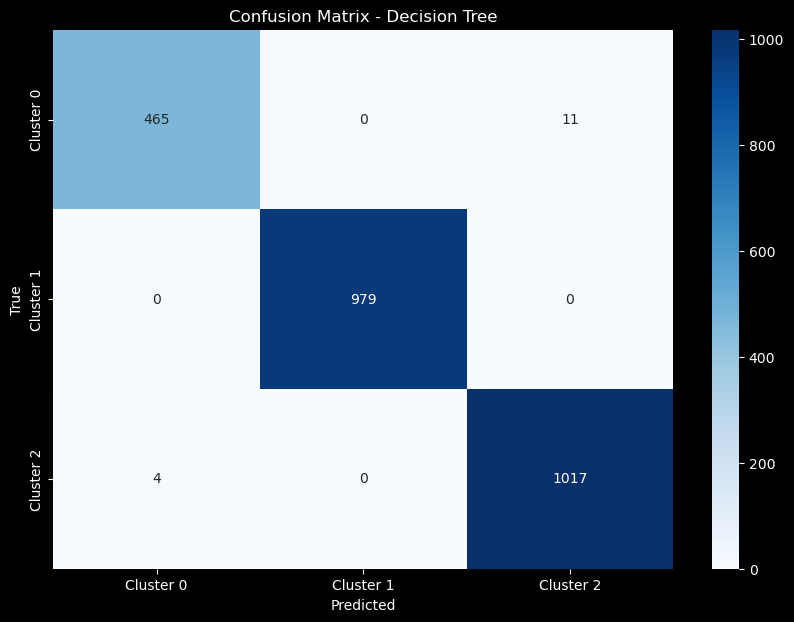


Model: Gradient Boosting
Confusion Matrix:
[[ 470    0    6]
 [   0  979    0]
 [   3    0 1018]]
Accuracy: 0.9964

Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.99      0.99       476
           1       1.00      1.00      1.00       979
           2       0.99      1.00      1.00      1021

    accuracy                           1.00      2476
   macro avg       1.00      0.99      1.00      2476
weighted avg       1.00      1.00      1.00      2476



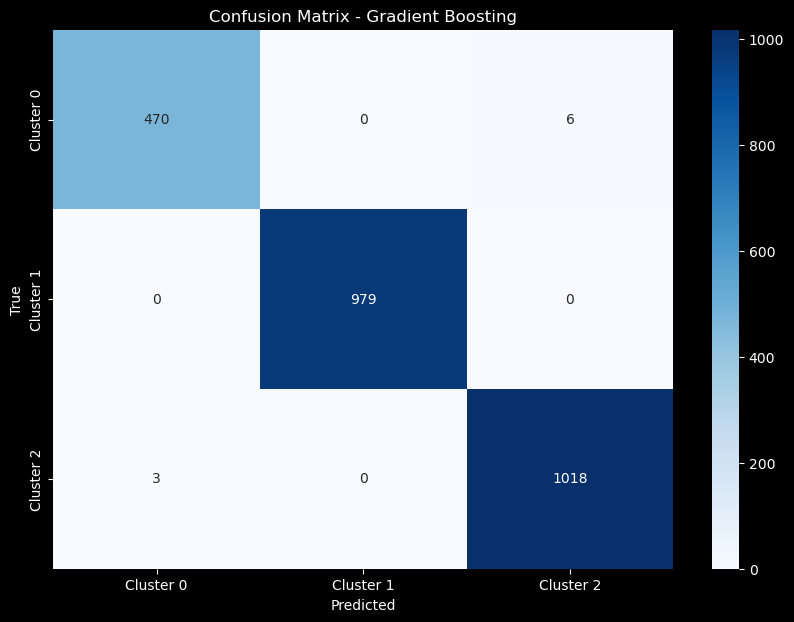


Model: Neural Network
Confusion Matrix:
[[ 471    0    5]
 [   0  979    0]
 [   2    0 1019]]
Accuracy: 0.9972

Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.99      0.99       476
           1       1.00      1.00      1.00       979
           2       1.00      1.00      1.00      1021

    accuracy                           1.00      2476
   macro avg       1.00      1.00      1.00      2476
weighted avg       1.00      1.00      1.00      2476



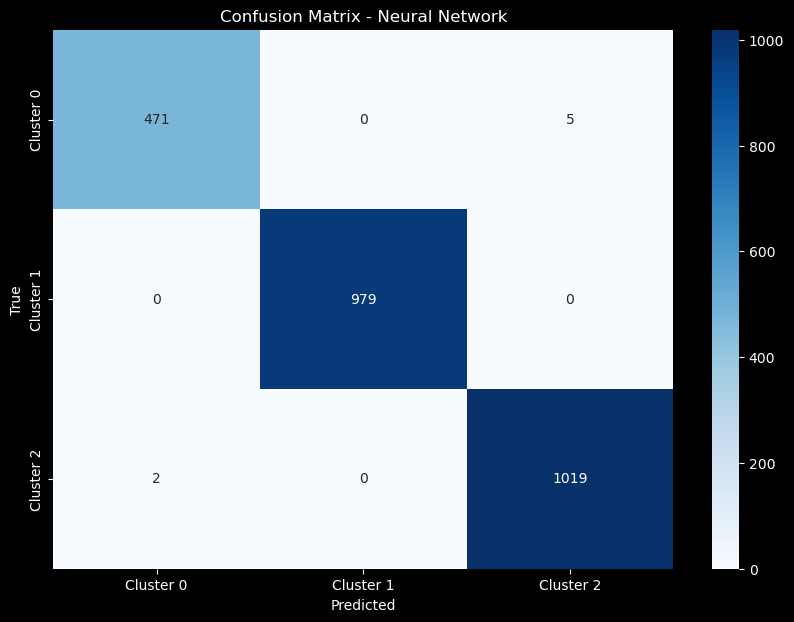


Model: K-Nearest Neighbors
Confusion Matrix:
[[ 470    0    6]
 [   0  979    0]
 [   5    0 1016]]
Accuracy: 0.9956

Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.99      0.99       476
           1       1.00      1.00      1.00       979
           2       0.99      1.00      0.99      1021

    accuracy                           1.00      2476
   macro avg       0.99      0.99      0.99      2476
weighted avg       1.00      1.00      1.00      2476



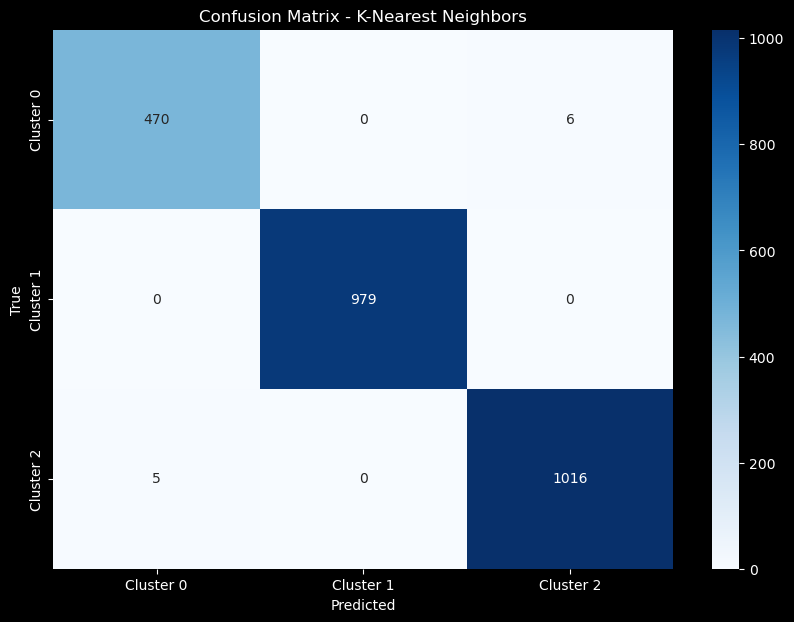

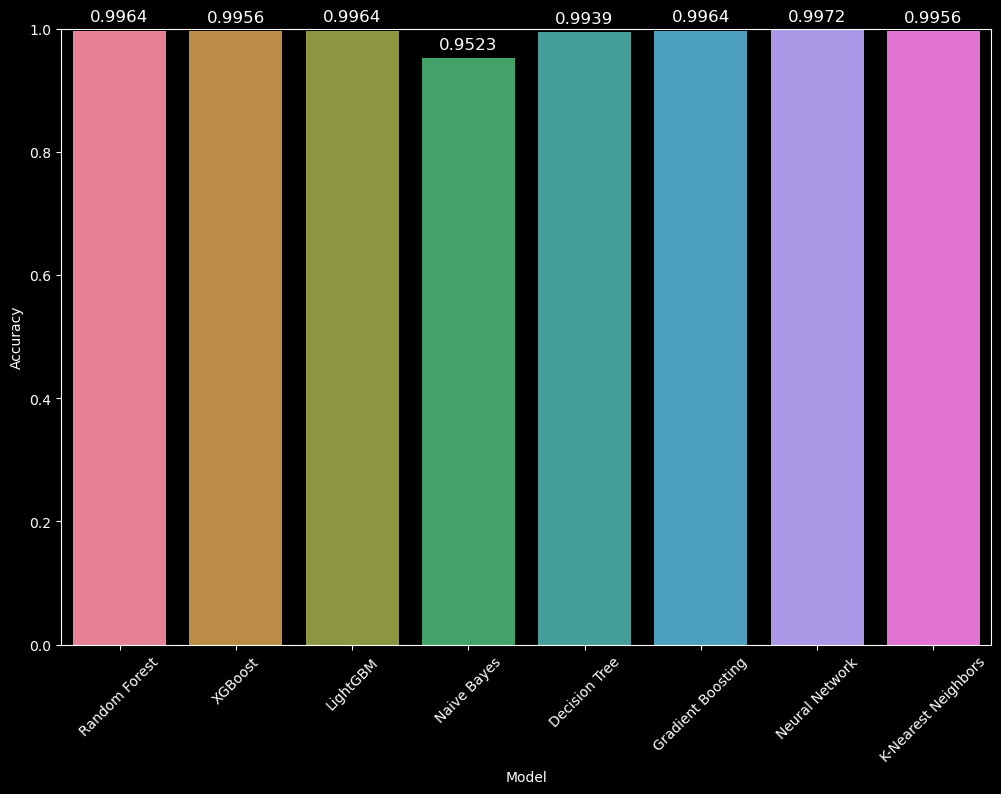

In [85]:
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neural_network import MLPClassifier
from sklearn.linear_model import LinearRegression
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import numpy as np

# Models dictionary
models = {
    'Random Forest': RandomForestClassifier(random_state=42),
    'XGBoost': XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42),
    'LightGBM': LGBMClassifier(random_state=42),
    'Naive Bayes': GaussianNB(),
    'Decision Tree': DecisionTreeClassifier(random_state=42),
    'Gradient Boosting': GradientBoostingClassifier(random_state=42),
    'Neural Network': MLPClassifier(max_iter=1000, random_state=42),
    'K-Nearest Neighbors': KNeighborsClassifier(),
}

# Define target column
target_column = 'labels'

# Features and target
features = df_cleaned_labeled_final.drop(columns=[target_column])
target = df_cleaned_labeled_final[target_column]

# Split the data
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.3, random_state=42)

# Dictionary to store the accuracies of each model
accuracies = {}

# Train and evaluate each model
for name, model in models.items():
    # Train the model
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    # Print classification report and confusion matrix
    print(f"\nModel: {name}")
    
    cm = confusion_matrix(y_test, y_pred)
    print("Confusion Matrix:")
    print(cm)
    
    accuracy = accuracy_score(y_test, y_pred)
    accuracies[name] = accuracy
    print(f"Accuracy: {accuracy:.4f}")
    
    print("\nClassification Report:")
    print(classification_report(y_test, y_pred))
    
    plt.figure(figsize=(10, 7))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
                xticklabels=['Cluster 0', 'Cluster 1', 'Cluster 2'],
                yticklabels=['Cluster 0', 'Cluster 1', 'Cluster 2'])
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.title(f'Confusion Matrix - {name}')
    plt.show()

# Plot the accuracies using a bar chart
plt.figure(figsize=(12, 8))
colors = sns.color_palette('husl', len(models))  # Generate a list of colors
sns.barplot(x=list(accuracies.keys()), y=list(accuracies.values()), palette=colors)
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.xticks(rotation=45)

plt.ylim(0, 1)  # Assuming accuracies are between 0 and 1

# Add annotations on top of the bars
for i, (name, accuracy) in enumerate(accuracies.items()):
    plt.text(i, accuracy + 0.01, f'{accuracy:.4f}', ha='center', va='bottom', fontsize=12)

plt.show()



Model: SVM
Confusion Matrix:
[[ 450    0   26]
 [   0  979    0]
 [   0    0 1021]]
Accuracy: 0.9895

Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.95      0.97       476
           1       1.00      1.00      1.00       979
           2       0.98      1.00      0.99      1021

    accuracy                           0.99      2476
   macro avg       0.99      0.98      0.99      2476
weighted avg       0.99      0.99      0.99      2476



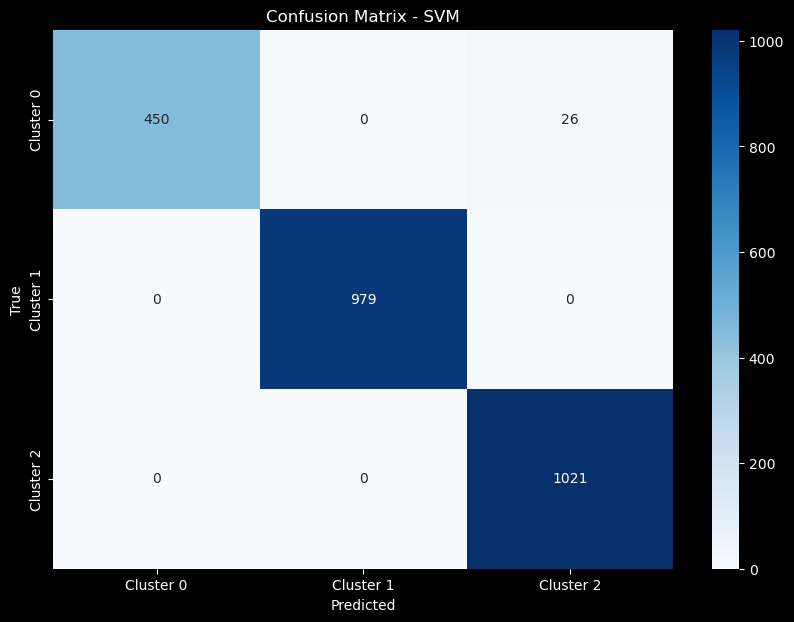

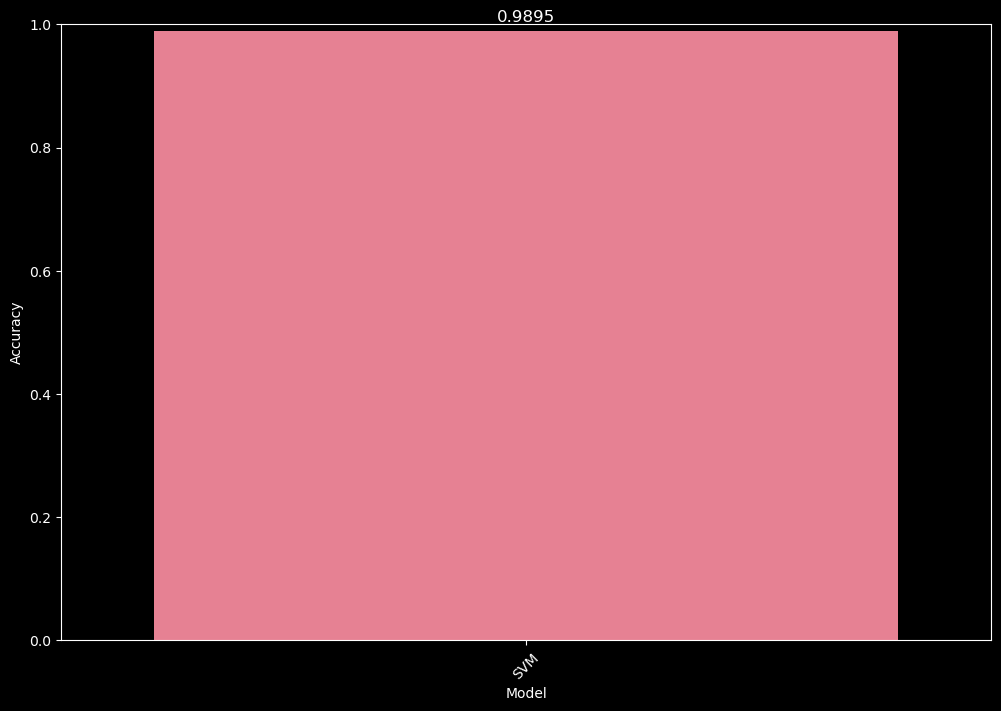

In [92]:
from sklearn.svm import SVC
models2 = {
    # 'Naive Bayes': GaussianNB(),
    # 'Descision Tree':DecisionTreeClassifier()
    "SVM":SVC()
}

# Define target column
target_column = 'labels'

# Features and target
features = df_cleaned_labeled_final.drop(columns=[target_column])
target = df_cleaned_labeled_final[target_column]

# Split the data
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.3, random_state=42)

# Dictionary to store the accuracies of each model
accuracies = {}

# Train and evaluate each model
for name, model in models2.items():
    # Train the model
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    # Print classification report and confusion matrix
    print(f"\nModel: {name}")

    cm = confusion_matrix(y_test, y_pred)
    print("Confusion Matrix:")
    print(cm)

    accuracy = accuracy_score(y_test, y_pred)
    accuracies[name] = accuracy
    print(f"Accuracy: {accuracy:.4f}")

    print("\nClassification Report:")
    print(classification_report(y_test, y_pred))

    plt.figure(figsize=(10, 7))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
                xticklabels=['Cluster 0', 'Cluster 1', 'Cluster 2'],
                yticklabels=['Cluster 0', 'Cluster 1', 'Cluster 2'])
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.title(f'Confusion Matrix - {name}')
    plt.show()

# Plot the accuracies using a bar chart
plt.figure(figsize=(12, 8))
colors = sns.color_palette('husl', len(models))  # Generate a list of colors
sns.barplot(x=list(accuracies.keys()), y=list(accuracies.values()), palette=colors)
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.xticks(rotation=45)

plt.ylim(0, 1)  # Assuming accuracies are between 0 and 1

# Add annotations on top of the bars
for i, (name, accuracy) in enumerate(accuracies.items()):
    plt.text(i, accuracy + 0.01, f'{accuracy:.4f}', ha='center', va='bottom', fontsize=12)

plt.show()

Testing parameters: {'C': 1, 'gamma': 'scale', 'kernel': 'linear', 'max_iter': 15000}
Testing score: 0.9981829194427619


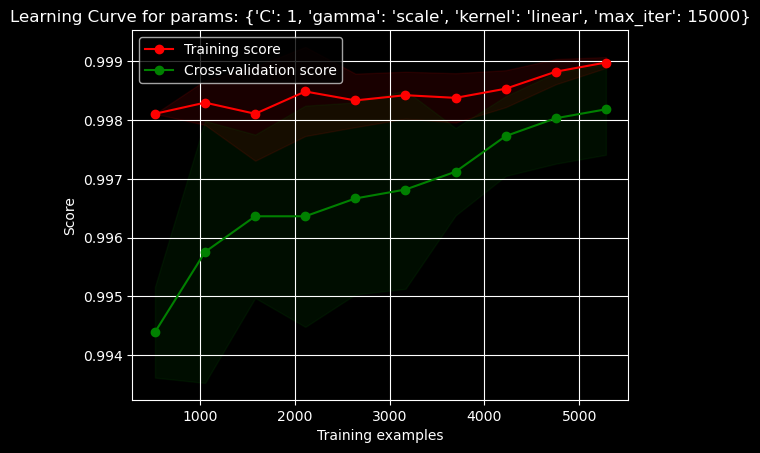

Testing parameters: {'C': 1, 'gamma': 'scale', 'kernel': 'poly', 'max_iter': 15000}
Testing score: 0.9866747425802543


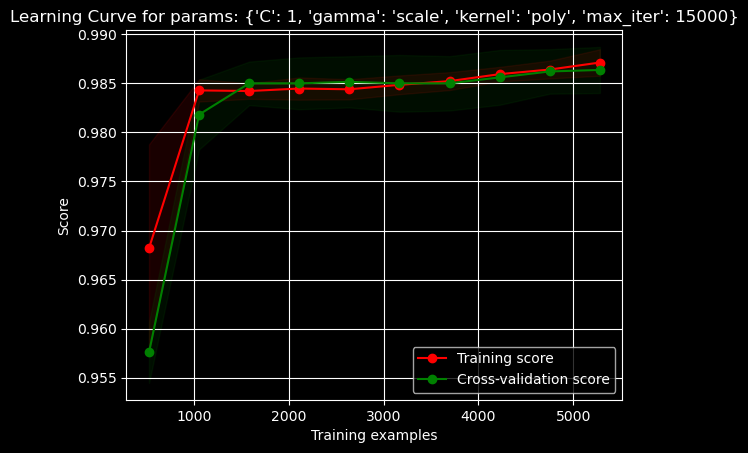

Testing parameters: {'C': 1, 'gamma': 'scale', 'kernel': 'rbf', 'max_iter': 15000}
Testing score: 0.9854633555420957


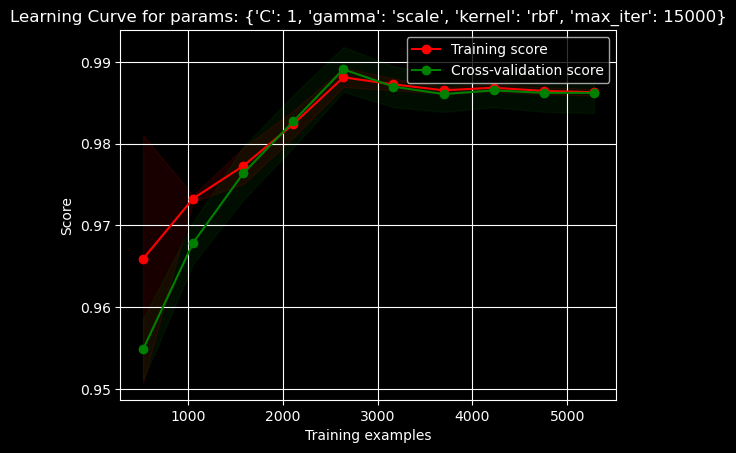

Testing parameters: {'C': 1, 'gamma': 'scale', 'kernel': 'sigmoid', 'max_iter': 15000}
Testing score: 0.9757722592368262


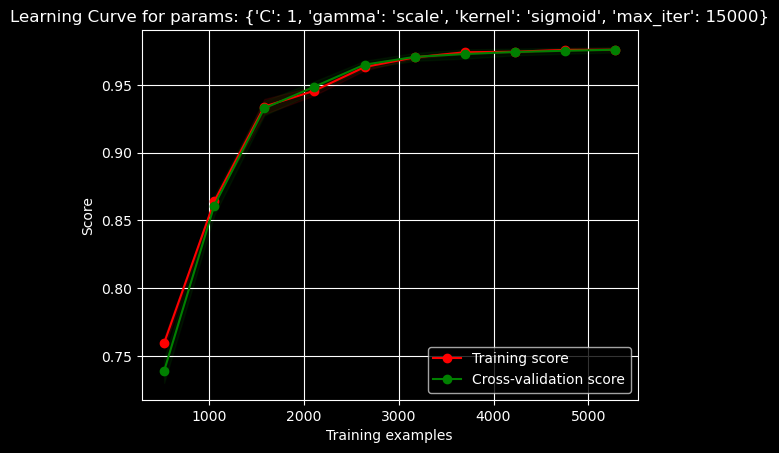

Testing parameters: {'C': 1, 'gamma': 'auto', 'kernel': 'linear', 'max_iter': 15000}
Testing score: 0.9981829194427619


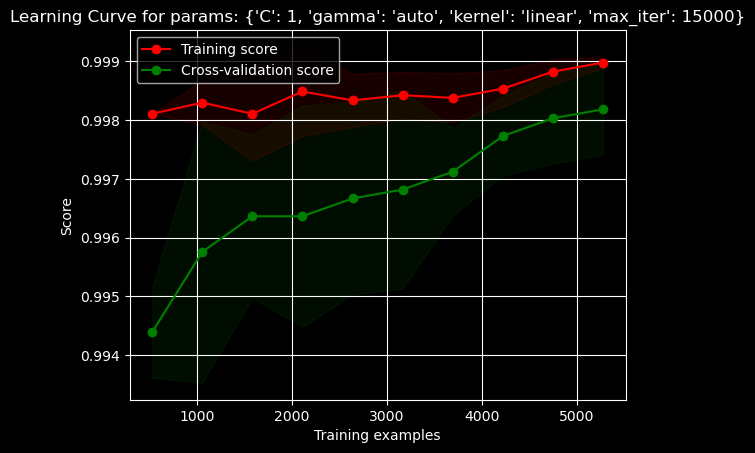

Testing parameters: {'C': 1, 'gamma': 'auto', 'kernel': 'poly', 'max_iter': 15000}
Testing score: 0.9963658388855239


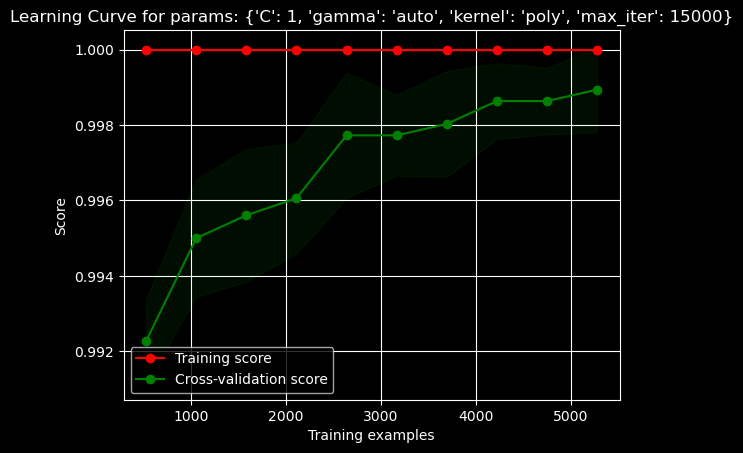

Testing parameters: {'C': 1, 'gamma': 'auto', 'kernel': 'rbf', 'max_iter': 15000}
Testing score: 0.9963658388855239


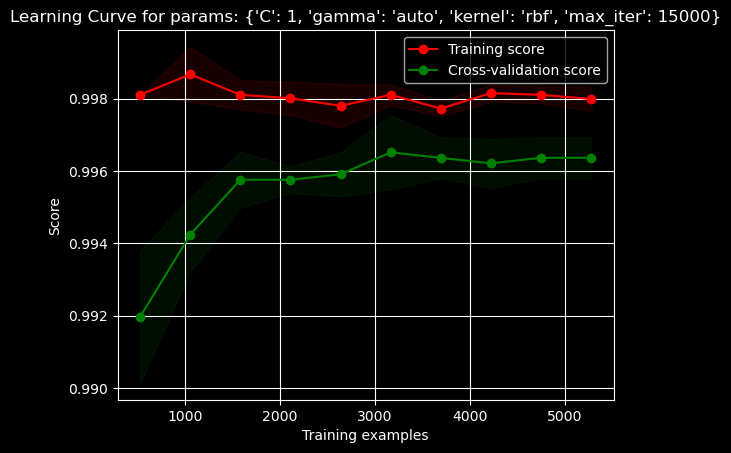

Testing parameters: {'C': 1, 'gamma': 'auto', 'kernel': 'sigmoid', 'max_iter': 15000}
Testing score: 0.4082374318594791


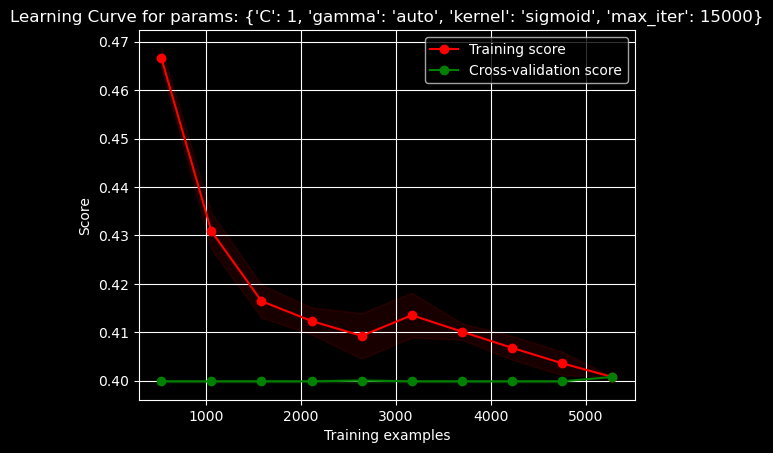

Testing parameters: {'C': 2, 'gamma': 'scale', 'kernel': 'linear', 'max_iter': 15000}
Testing score: 0.9975772259236826


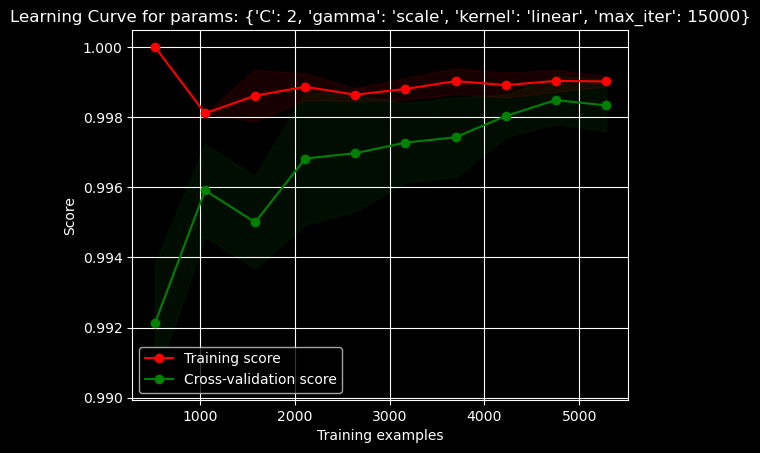

Testing parameters: {'C': 2, 'gamma': 'scale', 'kernel': 'poly', 'max_iter': 15000}
Testing score: 0.9945487583282859


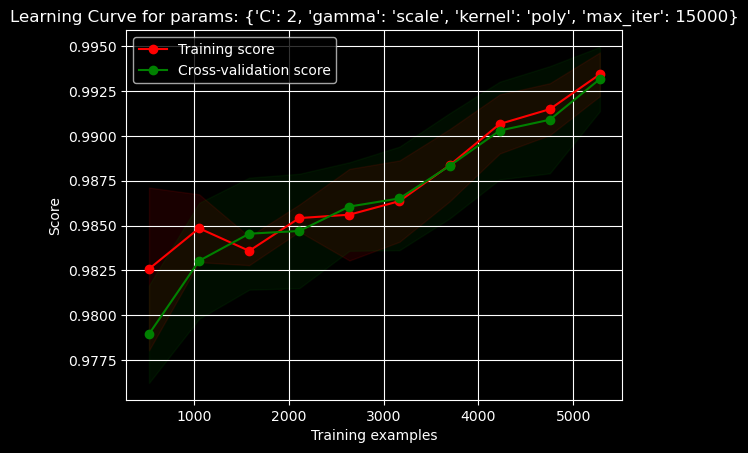

Testing parameters: {'C': 2, 'gamma': 'scale', 'kernel': 'rbf', 'max_iter': 15000}
Testing score: 0.9884918231374924


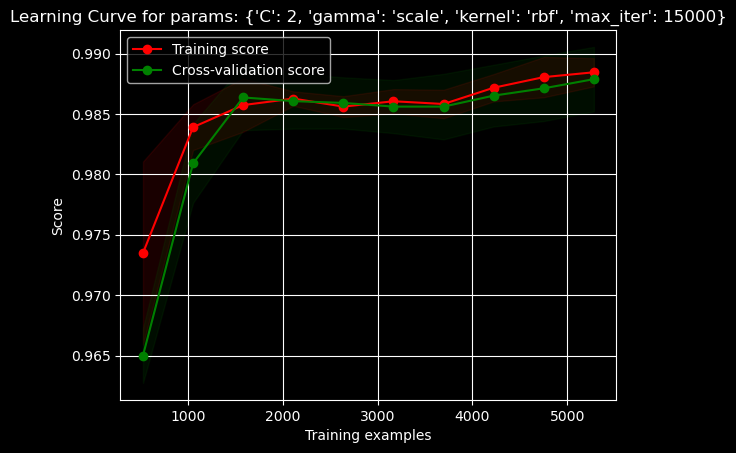

Testing parameters: {'C': 2, 'gamma': 'scale', 'kernel': 'sigmoid', 'max_iter': 15000}
Testing score: 0.9812235009085403


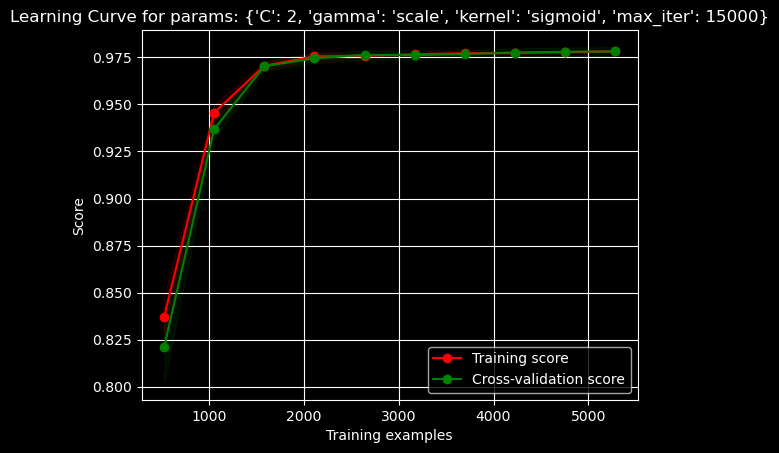

Testing parameters: {'C': 2, 'gamma': 'auto', 'kernel': 'linear', 'max_iter': 15000}
Testing score: 0.9975772259236826


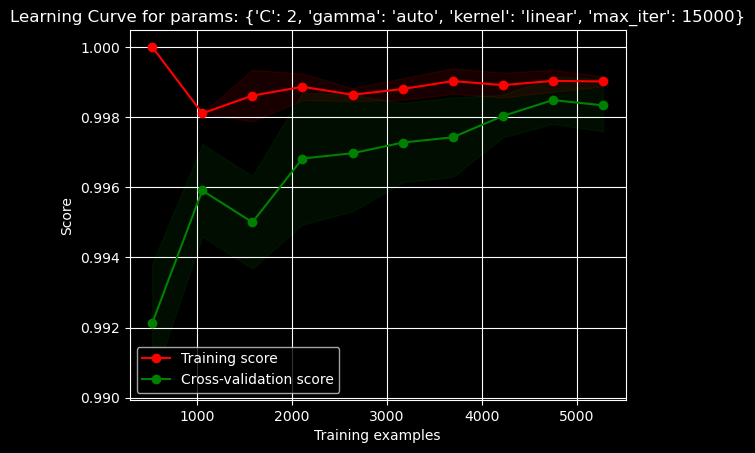

Testing parameters: {'C': 2, 'gamma': 'auto', 'kernel': 'poly', 'max_iter': 15000}
Testing score: 0.9963658388855239


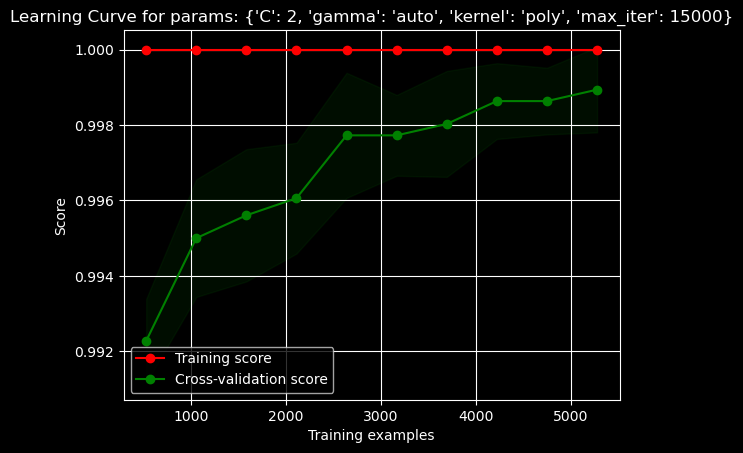

Testing parameters: {'C': 2, 'gamma': 'auto', 'kernel': 'rbf', 'max_iter': 15000}
Testing score: 0.9981829194427619


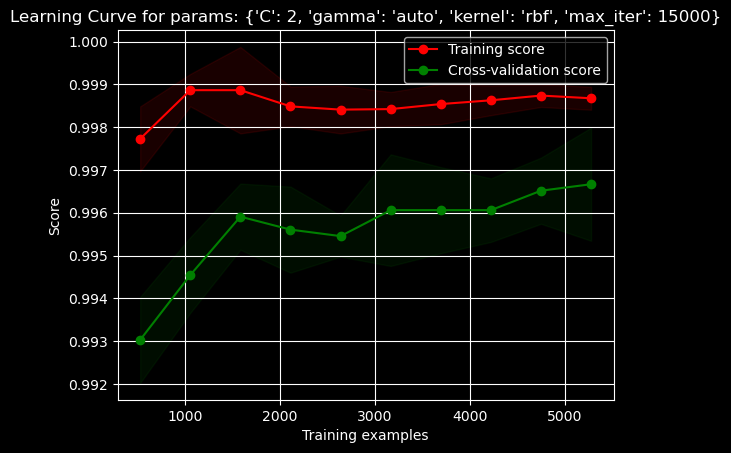

Testing parameters: {'C': 2, 'gamma': 'auto', 'kernel': 'sigmoid', 'max_iter': 15000}
Testing score: 0.4082374318594791


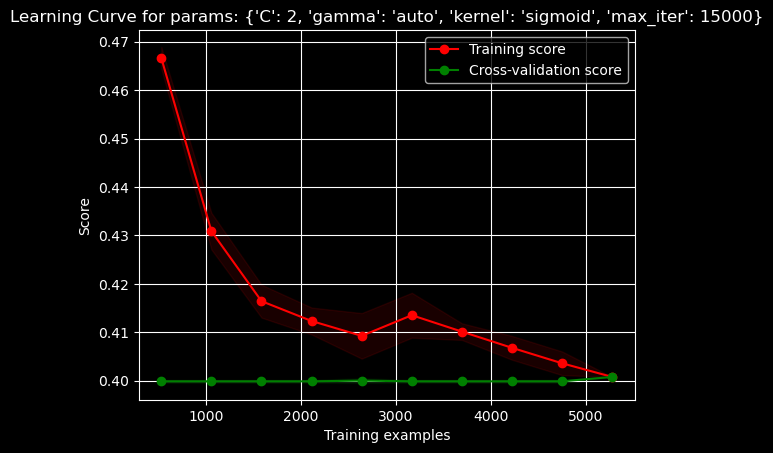

Testing parameters: {'C': 16, 'gamma': 'scale', 'kernel': 'linear', 'max_iter': 15000}
Testing score: 0.9981829194427619


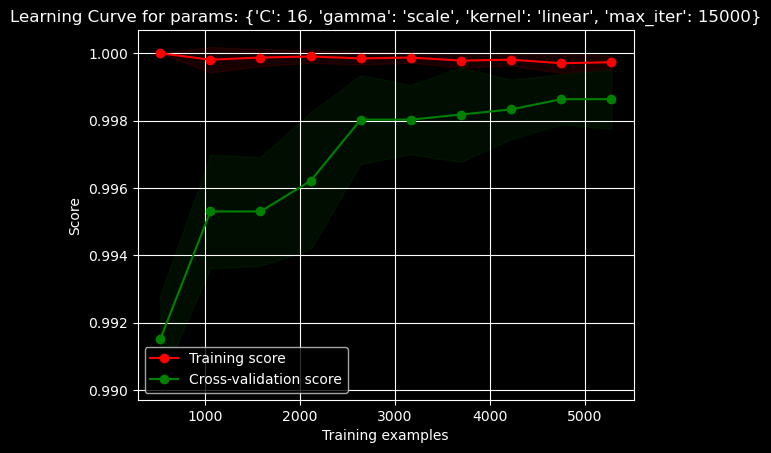

Testing parameters: {'C': 16, 'gamma': 'scale', 'kernel': 'poly', 'max_iter': 15000}
Testing score: 0.9987886129618413


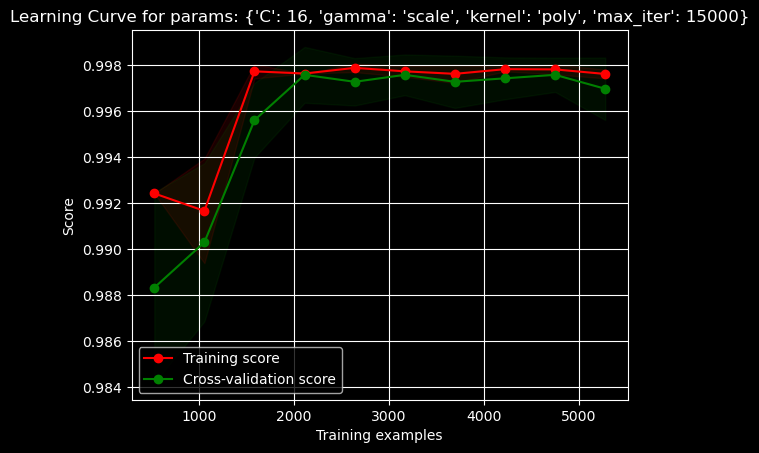

Testing parameters: {'C': 16, 'gamma': 'scale', 'kernel': 'rbf', 'max_iter': 15000}
Testing score: 0.9987886129618413


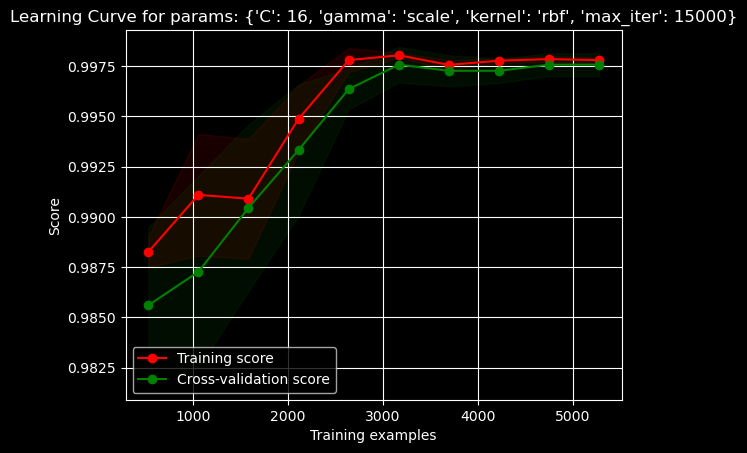

Testing parameters: {'C': 16, 'gamma': 'scale', 'kernel': 'sigmoid', 'max_iter': 15000}
Testing score: 0.9921259842519685


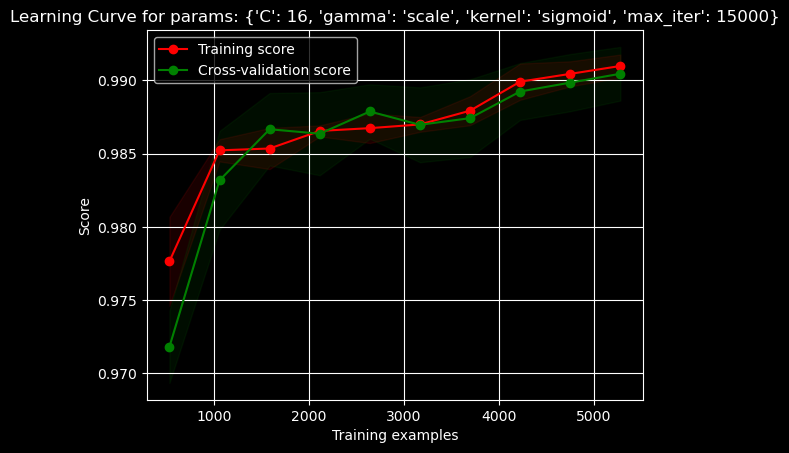

Testing parameters: {'C': 16, 'gamma': 'auto', 'kernel': 'linear', 'max_iter': 15000}
Testing score: 0.9981829194427619


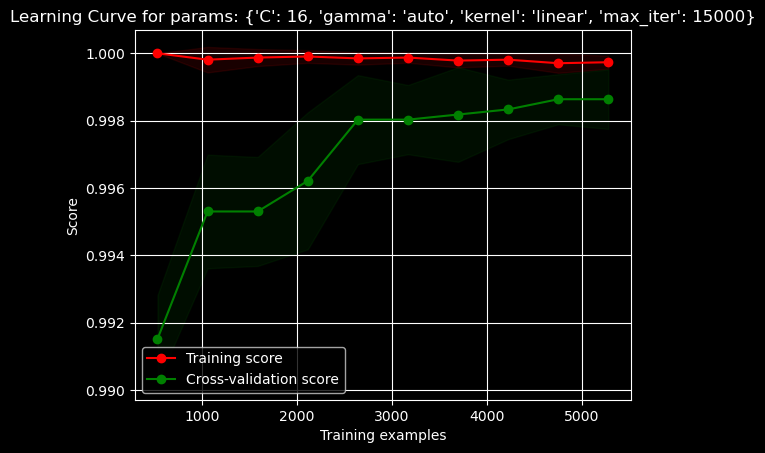

Testing parameters: {'C': 16, 'gamma': 'auto', 'kernel': 'poly', 'max_iter': 15000}
Testing score: 0.9963658388855239


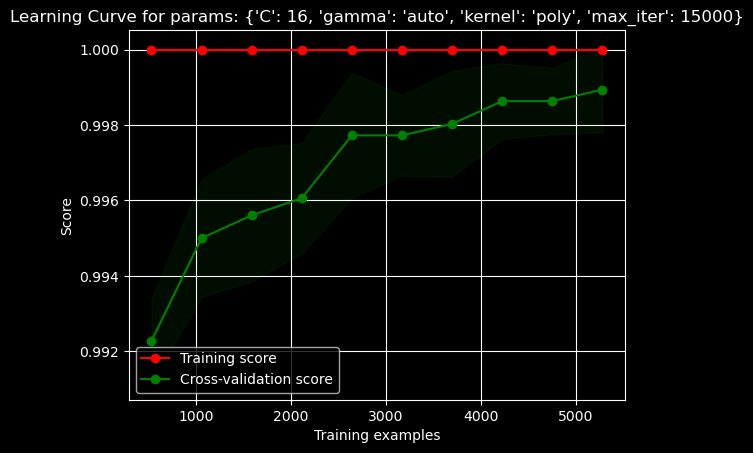

Testing parameters: {'C': 16, 'gamma': 'auto', 'kernel': 'rbf', 'max_iter': 15000}
Testing score: 0.9981829194427619


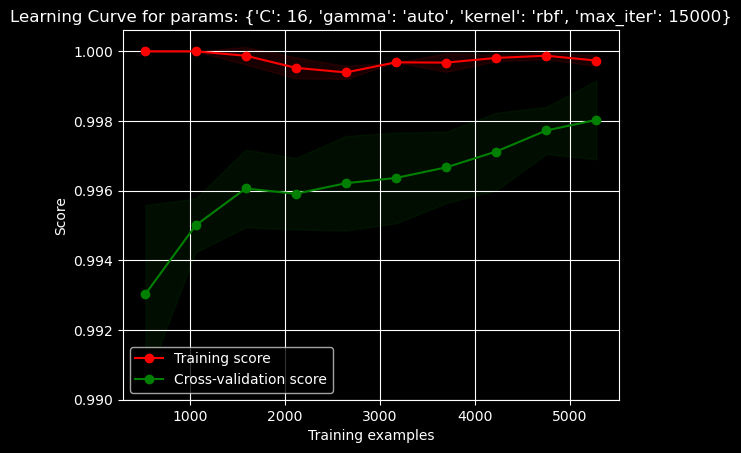

Testing parameters: {'C': 16, 'gamma': 'auto', 'kernel': 'sigmoid', 'max_iter': 15000}
Testing score: 0.4082374318594791


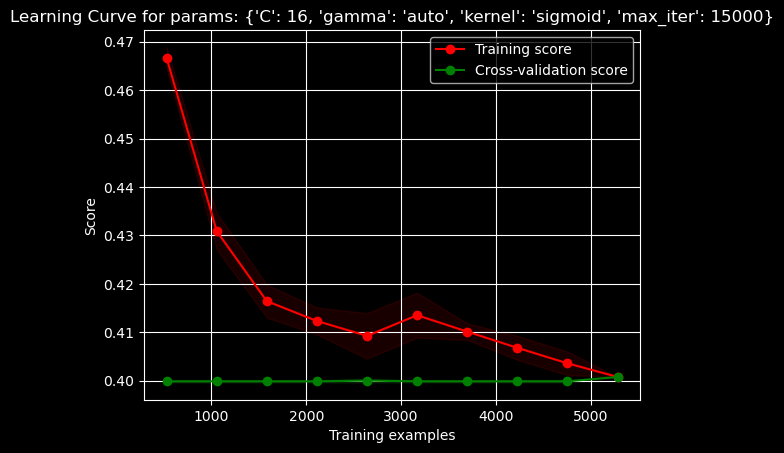

Training score: 0.9977272727272727
Testing score: 0.9987886129618413
Best parameters: {'C': 16, 'gamma': 'scale', 'kernel': 'poly', 'max_iter': 15000}
Confusion matrix:
 [[325   0   1]
 [  0 674   0]
 [  1   0 650]]


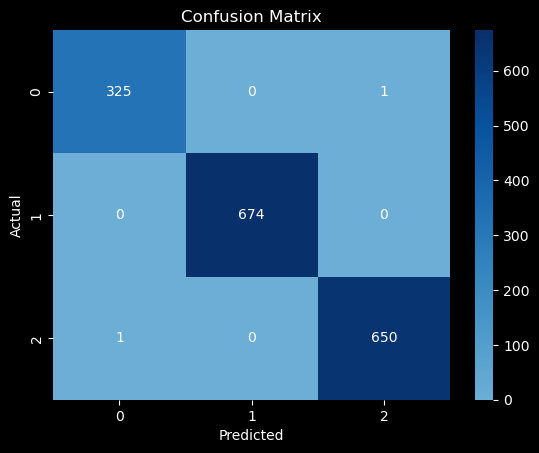

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       326
           1       1.00      1.00      1.00       674
           2       1.00      1.00      1.00       651

    accuracy                           1.00      1651
   macro avg       1.00      1.00      1.00      1651
weighted avg       1.00      1.00      1.00      1651



In [105]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, ParameterGrid
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import learning_curve
import numpy as np

def plot_learning_curve(estimator, X, y, title):
    # Compute the learning curves
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=5, n_jobs=-1, train_sizes=np.linspace(0.1, 1.0, 10)
    )

    # Compute mean and std of training and test scores
    train_mean = np.mean(train_scores, axis=1)
    train_std = np.std(train_scores, axis=1)
    test_mean = np.mean(test_scores, axis=1)
    test_std = np.std(test_scores, axis=1)

    # Plot learning curve
    plt.figure()
    plt.title(title)
    plt.xlabel('Training examples')
    plt.ylabel('Score')
    plt.grid()

    plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, alpha=0.1, color='r')
    plt.fill_between(train_sizes, test_mean - test_std, test_mean + test_std, alpha=0.1, color='g')
    plt.plot(train_sizes, train_mean, 'o-', color='r', label='Training score')
    plt.plot(train_sizes, test_mean, 'o-', color='g', label='Cross-validation score')

    plt.legend(loc='best')
    plt.show()

def SVvC(X, y):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Define parameter grid for SVC
    param_grid = {
        'C': [1, 2, 16],
        'kernel': ['linear', 'poly', 'rbf', 'sigmoid'],
        'gamma': ['scale', 'auto'],
        'max_iter': [15000]
    }

    best_score = 0
    best_params = None

    # Perform Grid Search with cross-validation
    for params in ParameterGrid(param_grid):
        print("Testing parameters:", params)

        # Create SVC with current parameters
        svc = SVC(**params, random_state=44)

        # Fit the model
        svc.fit(X_train, y_train)

        # Evaluate model
        test_score = svc.score(X_test, y_test)
        print('Testing score:', test_score)

        # Plot learning curve
        plot_learning_curve(svc, X_train, y_train, f'Learning Curve for params: {params}')

        # Check if current model is the best
        if test_score > best_score:
            best_score = test_score
            best_params = params

    # Train the best model
    best_svc = SVC(**best_params, random_state=44)
    best_svc.fit(X_train, y_train)

    # Print training and testing scores
    print('Training score:', best_svc.score(X_train, y_train))
    print('Testing score:', best_svc.score(X_test, y_test))
    print('Best parameters:', best_params)

    # Predictions and Confusion matrix
    y_pred = best_svc.predict(X_test)
    CM = confusion_matrix(y_test, y_pred)
    print("Confusion matrix:\n", CM)

    # Visualize Confusion matrix with custom colormap
    sns.heatmap(CM, annot=True, fmt='d', cmap='Blues', center=True)
    plt.title('Confusion Matrix')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()

    # Classification report
    print('Classification Report:\n', classification_report(y_test, y_pred))

    return y_pred, y_test, X_test

# Example usage:
# Replace `features` and `target` with your actual data
y_pred, y_test, X_test = SVvC(features, target)


In [127]:
svm_model = SVC(
    C=2,
    gamma='scale',
    kernel='sigmoid',
    max_iter=15000,
    probability=True
)

# Train the model
svm_model.fit(X_train, y_train)

# Make predictions
y_pred = svm_model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
accuracy

0.9794064203513022

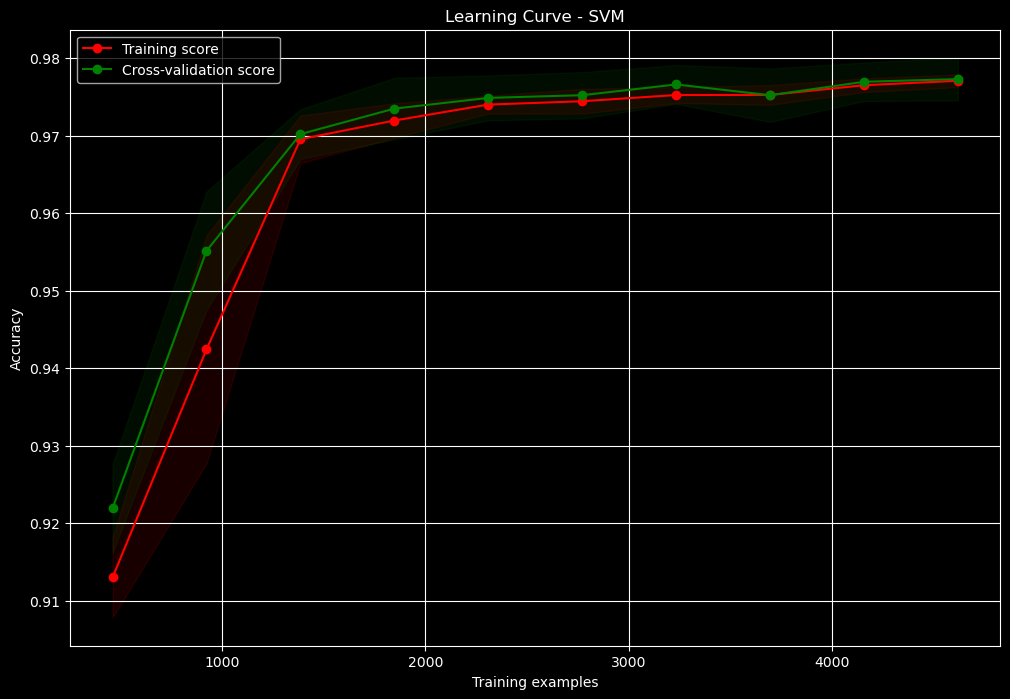

In [128]:
from sklearn.model_selection import learning_curve

# Function to plot the learning curve
def plot_learning_curve(model, X_train, y_train, title):
    plt.figure(figsize=(12, 8))

    # Generate learning curves
    train_sizes, train_scores, test_scores = learning_curve(svm_model, X_train, y_train, cv=5, scoring='accuracy',
                                                            train_sizes=np.linspace(0.1, 1.0, 10), random_state=42)
    # Calculate mean and standard deviation for training and test scores
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)

    # Plot the learning curves
    plt.fill_between(train_sizes, train_scores_mean - train_scores_std, train_scores_mean + train_scores_std, alpha=0.1, color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std, test_scores_mean + test_scores_std, alpha=0.1, color="g")

    plt.plot(train_sizes, train_scores_mean, 'o-', color="r", label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g", label="Cross-validation score")

    plt.title(title)
    plt.xlabel("Training examples")
    plt.ylabel("Accuracy")
    plt.legend(loc="best")
    plt.grid()
    plt.show()

# Plot learning curves for Naive Bayes and K-Nearest Neighbors
plot_learning_curve(svm_model, X_train, y_train, f"Learning Curve - {name}")


In [108]:
!pip install joblib

In [129]:
from joblib import dump

# Assuming you have a model named `model`
dump(svm_model, 'test_model.joblib')

['test_model.joblib']